In [1]:
#pip install --upgrade scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt 
%matplotlib inline 

# Import label encoder 
from sklearn import preprocessing 

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

"""
The line warnings.filterwarnings('ignore') is used to ignore all warning messages. It essentially 
suppresses the display of warning messages to the console or standard error output. This can be 
useful in situations where you want to run your code without being interrupted or cluttered with 
warning messages, especially when you are aware of the warnings and have intentionally decided to 
ignore them.
"""
import warnings
warnings.filterwarnings('ignore')

In [3]:
# Read the CSV file into a DataFrame
df=pd.read_csv('classData.csv')
#df.head(8)

# Define a function to highlight the background color
def highlight_background(val):
    return 'background-color: lightblue;border: 1.5px solid red; color:black' # You can choose any color you prefer

# Apply the style to the DataFrame using the Styler
styled_df = df.head(8).style.applymap(highlight_background)

# Display the styled DataFrame
styled_df

,G,C,B,A,Ia,Ib,Ic,Va,Vb,Vc
0,1,0,0,1,-151.291812,-9.677452,85.800162,0.400750,-0.132935,-0.267815
1,1,0,0,1,-336.186183,-76.283262,18.328897,0.312732,-0.123633,-0.189099
2,1,0,0,1,-502.891583,-174.648023,-80.924663,0.265728,-0.114301,-0.151428
3,1,0,0,1,-593.941905,-217.703359,-124.891924,0.235511,-0.104940,-0.130570
4,1,0,0,1,-643.663617,-224.159427,-132.282815,0.209537,-0.095554,-0.113983
5,1,0,0,1,-632.312778,-181.714572,-90.795453,0.193116,-0.086144,-0.106972
6,1,0,0,1,-557.391809,-119.468643,-29.529450,0.210004,-0.076712,-0.133291
7,1,0,0,1,-458.799929,-96.318922,-7.381847,0.273652,-0.067262,-0.206389


## Data Preprocessing

In [4]:
# No Null Value is Found
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7861 entries, 0 to 7860
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   G       7861 non-null   int64  
 1   C       7861 non-null   int64  
 2   B       7861 non-null   int64  
 3   A       7861 non-null   int64  
 4   Ia      7861 non-null   float64
 5   Ib      7861 non-null   float64
 6   Ic      7861 non-null   float64
 7   Va      7861 non-null   float64
 8   Vb      7861 non-null   float64
 9   Vc      7861 non-null   float64
dtypes: float64(6), int64(4)
memory usage: 614.3 KB


In [5]:
# No Null Value is Found
df.isnull().any()

G     False
C     False
B     False
A     False
Ia    False
Ib    False
Ic    False
Va    False
Vb    False
Vc    False
dtype: bool

In [6]:
# Shape-->(Row,Column)
df.shape

(7861, 10)

### Symmetrical Faults And Asymmetrical Faults

In [7]:
df.iloc[0]['B']

0.0

In [8]:
# Representing faults in one Fault_Type Column
df['Fault_Type'] = df['G'].astype('str') + df['C'].astype('str') + df['B'].astype('str') + df['A'].astype('str')

# Define a function to highlight the background color
def highlight_background(val):
    return 'background-color: lightblue;border: 1.5px solid red; color:black' # You can choose any color you prefer

# Apply the style to the DataFrame using the Styler
df.head(8).style.applymap(highlight_background)

,G,C,B,A,Ia,Ib,Ic,Va,Vb,Vc,Fault_Type
0,1,0,0,1,-151.291812,-9.677452,85.800162,0.400750,-0.132935,-0.267815,1001
1,1,0,0,1,-336.186183,-76.283262,18.328897,0.312732,-0.123633,-0.189099,1001
2,1,0,0,1,-502.891583,-174.648023,-80.924663,0.265728,-0.114301,-0.151428,1001
3,1,0,0,1,-593.941905,-217.703359,-124.891924,0.235511,-0.104940,-0.130570,1001
4,1,0,0,1,-643.663617,-224.159427,-132.282815,0.209537,-0.095554,-0.113983,1001
5,1,0,0,1,-632.312778,-181.714572,-90.795453,0.193116,-0.086144,-0.106972,1001
6,1,0,0,1,-557.391809,-119.468643,-29.529450,0.210004,-0.076712,-0.133291,1001
7,1,0,0,1,-458.799929,-96.318922,-7.381847,0.273652,-0.067262,-0.206389,1001


In [9]:
df["Fault_Type"].unique()

array(['1001', '1011', '0110', '0111', '1111', '0000'], dtype=object)

In [10]:
# Replacing Values of Fault Type For Easy Visualization

df['Fault_Type'][df['Fault_Type'] == '0000' ] = 'NO Fault'
df['Fault_Type'][df['Fault_Type'] == '1001' ] = 'Line A to Ground Fault'
df['Fault_Type'][df['Fault_Type'] == '0110' ] = 'Line B to Line C Fault'
df['Fault_Type'][df['Fault_Type'] == '1011' ] = 'Line A Line B to Ground Fault'
df['Fault_Type'][df['Fault_Type'] == '0111' ] = 'Line A Line B Line C Fault'
df['Fault_Type'][df['Fault_Type'] == '1111' ] = 'Line A Line B Line C to Ground Fault'

# Define a function to highlight the background color
def highlight_background(val):
    return 'background-color: lightgreen;border: 1.5px solid red; color:black' # You can choose any color you prefer

# Apply the style to the DataFrame using the Styler
df.head(8).style.applymap(highlight_background)

,G,C,B,A,Ia,Ib,Ic,Va,Vb,Vc,Fault_Type
0,1,0,0,1,-151.291812,-9.677452,85.800162,0.400750,-0.132935,-0.267815,Line A to Ground Fault
1,1,0,0,1,-336.186183,-76.283262,18.328897,0.312732,-0.123633,-0.189099,Line A to Ground Fault
2,1,0,0,1,-502.891583,-174.648023,-80.924663,0.265728,-0.114301,-0.151428,Line A to Ground Fault
3,1,0,0,1,-593.941905,-217.703359,-124.891924,0.235511,-0.104940,-0.130570,Line A to Ground Fault
4,1,0,0,1,-643.663617,-224.159427,-132.282815,0.209537,-0.095554,-0.113983,Line A to Ground Fault
5,1,0,0,1,-632.312778,-181.714572,-90.795453,0.193116,-0.086144,-0.106972,Line A to Ground Fault
6,1,0,0,1,-557.391809,-119.468643,-29.529450,0.210004,-0.076712,-0.133291,Line A to Ground Fault
7,1,0,0,1,-458.799929,-96.318922,-7.381847,0.273652,-0.067262,-0.206389,Line A to Ground Fault


In [11]:
# Analyzing the count of different types of fault types.
df['Fault_Type'].value_counts(ascending=False)

Fault_Type
NO Fault                                2365
Line A Line B to Ground Fault           1134
Line A Line B Line C to Ground Fault    1133
Line A to Ground Fault                  1129
Line A Line B Line C Fault              1096
Line B to Line C Fault                  1004
Name: count, dtype: int64

## EDA

### DATA VISUALIZATION

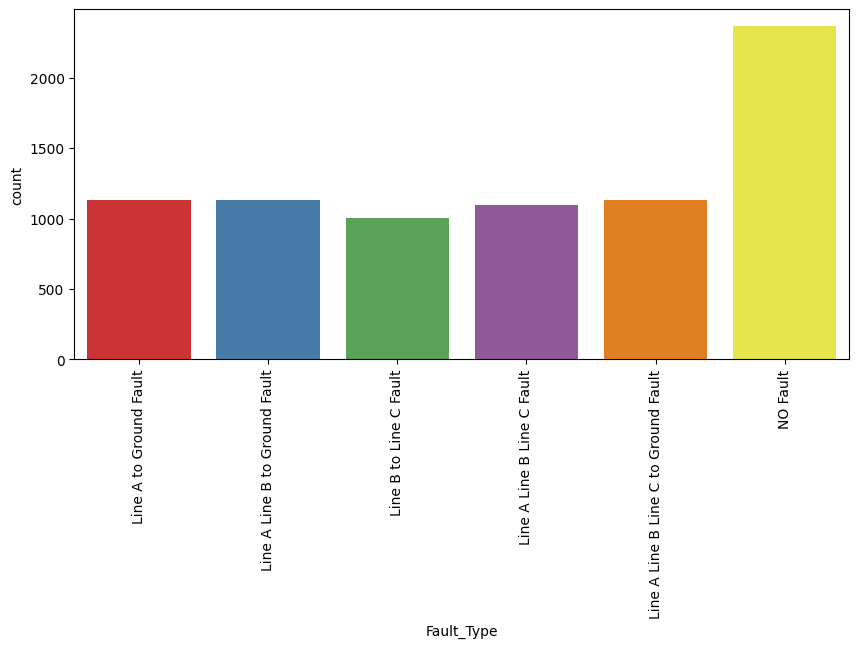

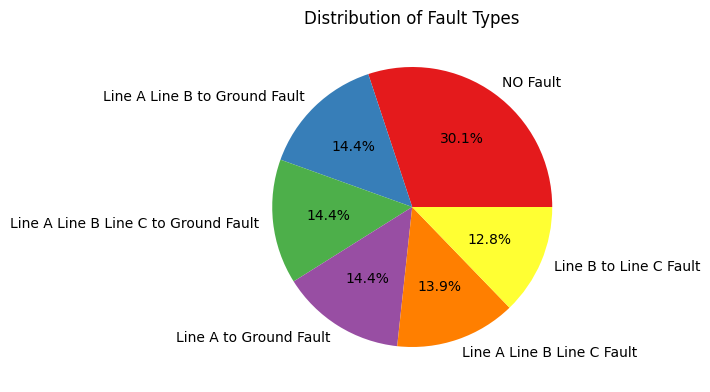

In [12]:
plt.figure(figsize=(10,10))
plt.subplot(2,1,1)
#plt.figure(figsize=(10,4))

sns.countplot(x='Fault_Type',data=df,palette='Set1')

# Set the fontsize of x-axis tick labels
plt.xticks(fontsize=10,rotation=90)
plt.show()


plt.figure(figsize=(10,10))
plt.subplot(2,1,2)
# Assuming 'Fault_Type' is the column in your DataFrame containing the categories
fault_type_counts = df['Fault_Type'].value_counts()

# Plot the pie chart
plt.pie(fault_type_counts, labels=fault_type_counts.index, autopct='%1.1f%%', colors=sns.color_palette('Set1'))

# Add a title
plt.title('Distribution of Fault Types')

# Display the plot
plt.show()

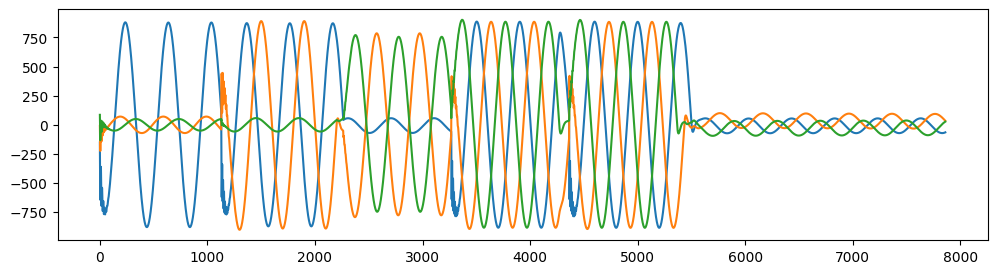

In [17]:
# Plotting the Current Values in the Dataset
plt.figure(figsize = (12,3))
plt.plot(df["Ia"])
plt.plot(df["Ib"])
plt.plot(df["Ic"]);

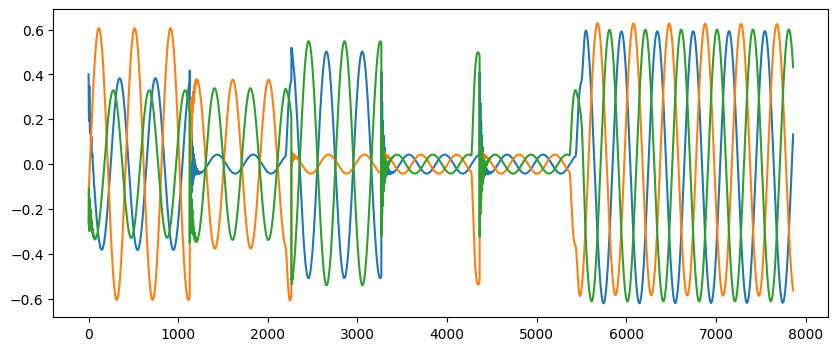

In [18]:
# Plotting the Current Values in the Dataset
plt.figure(figsize = (10,4))
plt.plot(df["Va"])
plt.plot(df["Vb"])
plt.plot(df["Vc"]);

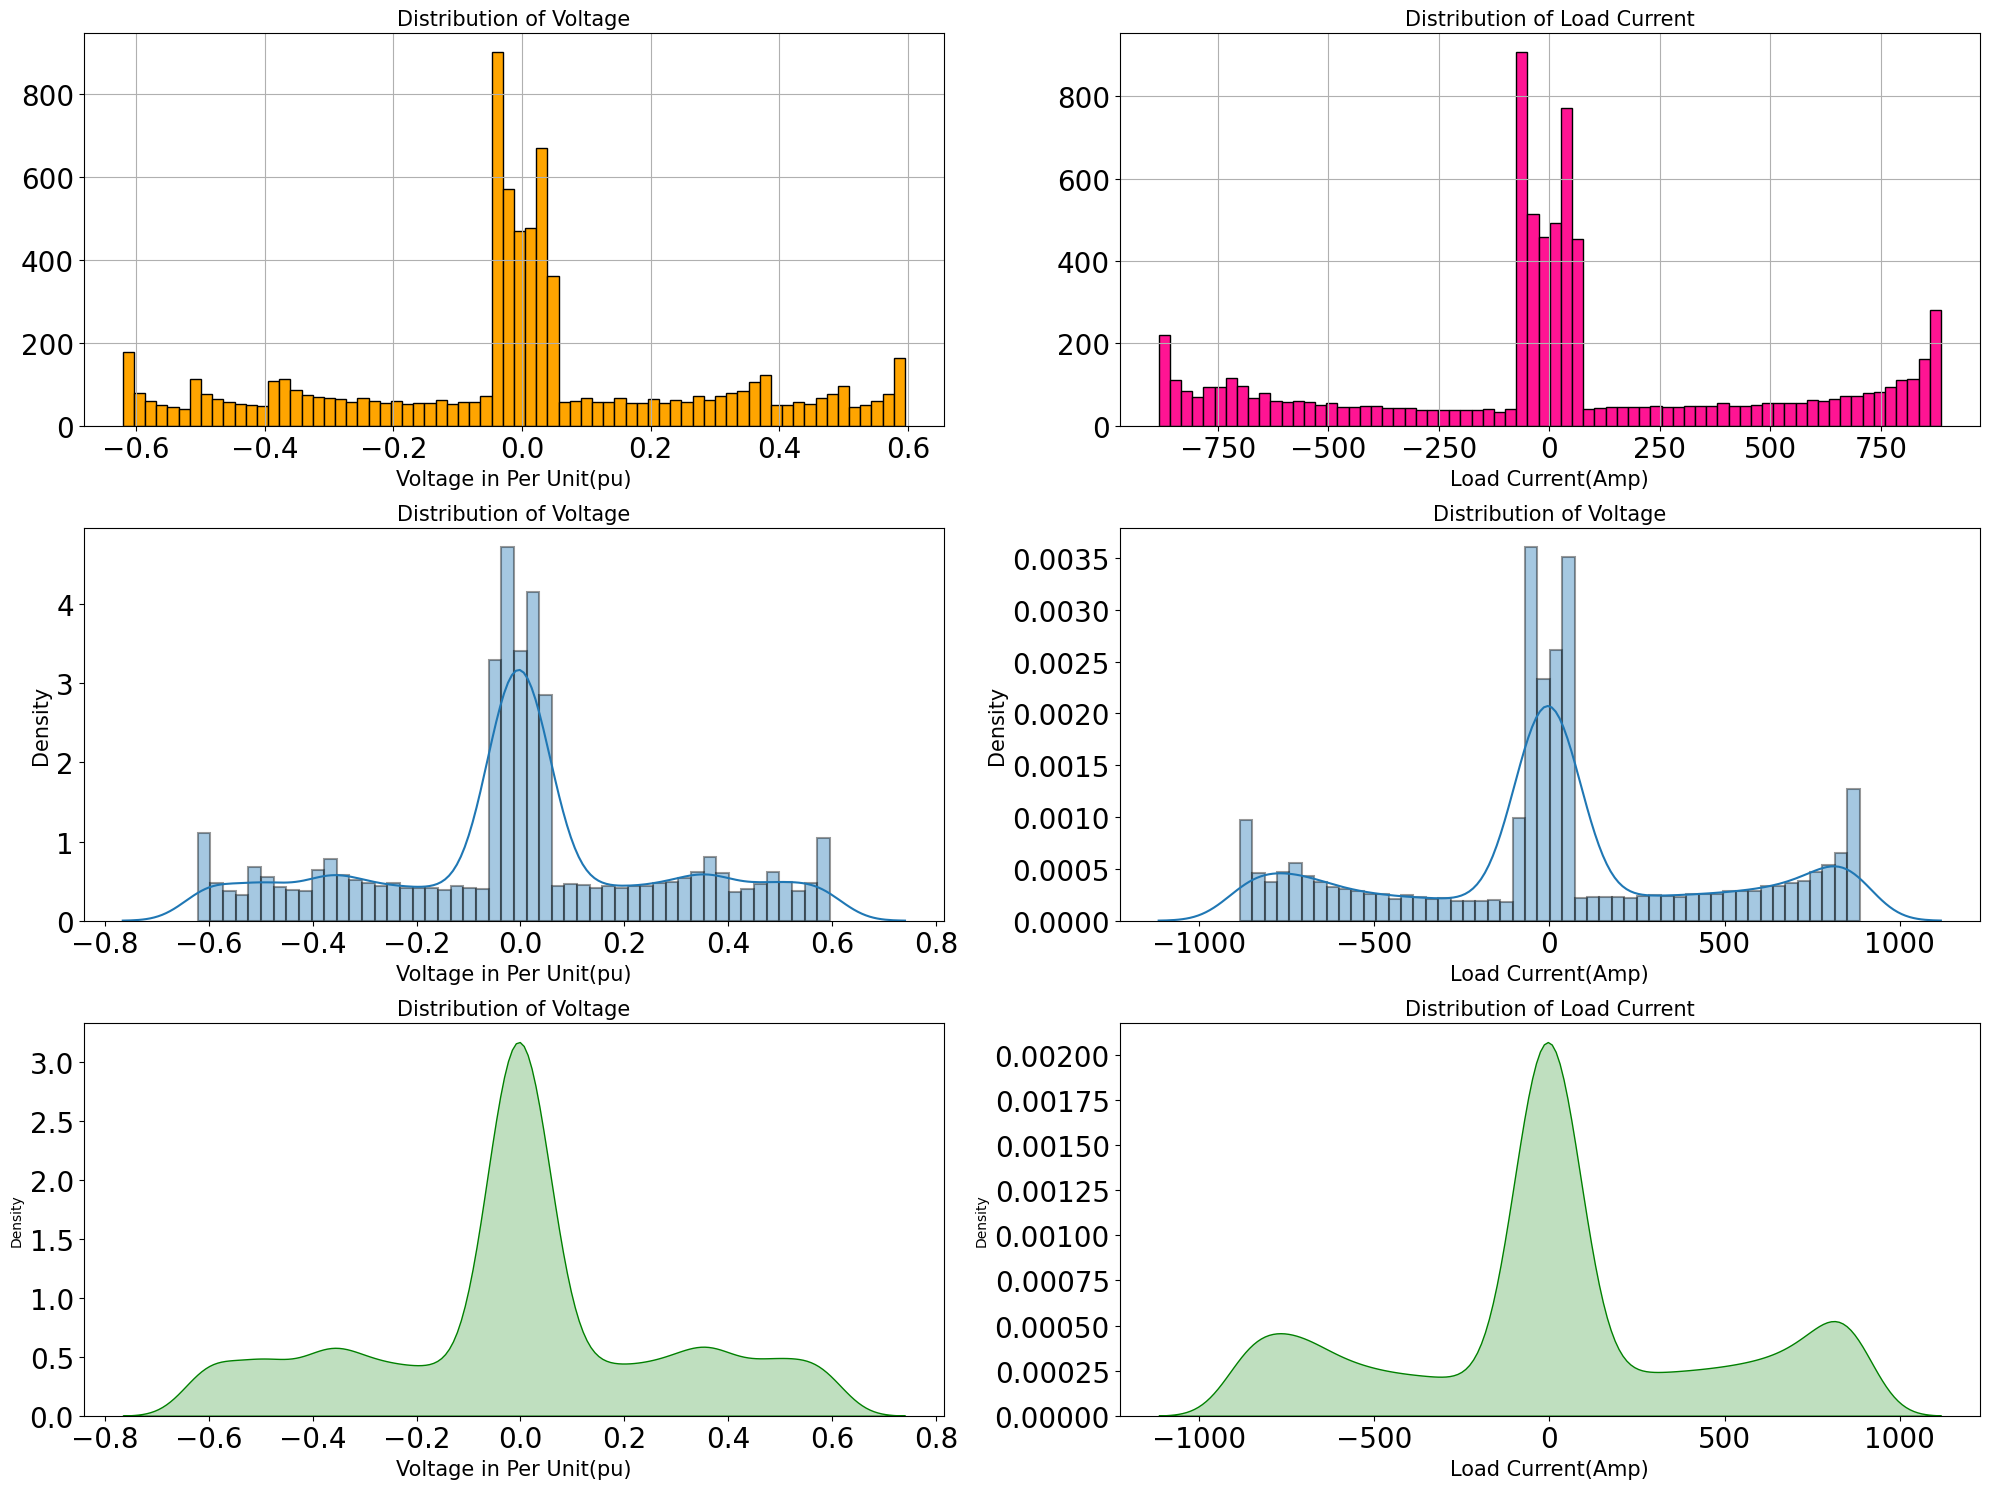

In [19]:
# Distribution of Data

plt.figure(figsize= (20,15))
plt.subplot(3,2,1)
df['Va'].hist(color='orange',edgecolor='black',lw=1,bins=70)
plt.xlabel('Voltage in Per Unit(pu)', fontsize = 15)
plt.title('Distribution of Voltage',fontsize = 15)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

plt.subplot(3,2,2)
df['Ia'].hist(color='deeppink',edgecolor='black',lw=1,bins=70)
plt.title('Distribution of Load Current',fontsize = 15)
plt.xlabel("Load Current(Amp)",fontsize=15)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

plt.subplot(3,2,3)
sns.distplot(df['Va'],kde=True,hist_kws={'edgecolor': 'black', 'linewidth': 1.5})
plt.xlabel('Voltage in Per Unit(pu)', fontsize = 15)
plt.ylabel('Density', fontsize = 15)
plt.title('Distribution of Voltage',fontsize = 15)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

plt.subplot(3,2,4)
sns.distplot(df['Ia'],kde=True,hist_kws={'edgecolor': 'black', 'linewidth': 1.5})
plt.xlabel("Load Current(Amp)", fontsize = 15)
plt.ylabel('Density', fontsize = 15)
plt.title('Distribution of Voltage',fontsize = 15)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

plt.subplot(3,2,5)
sns.kdeplot(df['Va'], shade = True, color = 'g')
plt.xlabel('Voltage in Per Unit(pu)', fontsize = 15)
plt.title('Distribution of Voltage',fontsize = 15)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

plt.subplot(3,2,6)
sns.kdeplot(df['Ia'], shade = True, color = 'g')
plt.title('Distribution of Load Current',fontsize = 15)
plt.xlabel("Load Current(Amp)",fontsize=15)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

plt.tight_layout()
plt.show()

## Analyzing Individual Fault

### Healthy Sytem(No Fault)

In [13]:
# Create an empty DataFrame to store the selected rows
df_no_fault = pd.DataFrame(columns=df.columns)
df_no_fault=df[df['Fault_Type']=='NO Fault']
df_no_fault.head()

,G,C,B,A,Ia,Ib,Ic,Va,Vb,Vc,Fault_Type
5496,0,0,0,0,61.806321,-22.861987,21.102428,0.366320,-0.567179,0.200859,NO Fault
5497,0,0,0,0,48.041678,-23.401108,21.273066,0.367341,-0.564257,0.196916,NO Fault
5498,0,0,0,0,34.256533,-23.909263,21.408047,0.368258,-0.561168,0.192910,NO Fault
5499,0,0,0,0,20.464350,-24.396165,21.501503,0.369086,-0.557916,0.188830,NO Fault
5500,0,0,0,0,7.109677,-25.075888,21.341967,0.370321,-0.554505,0.184184,NO Fault


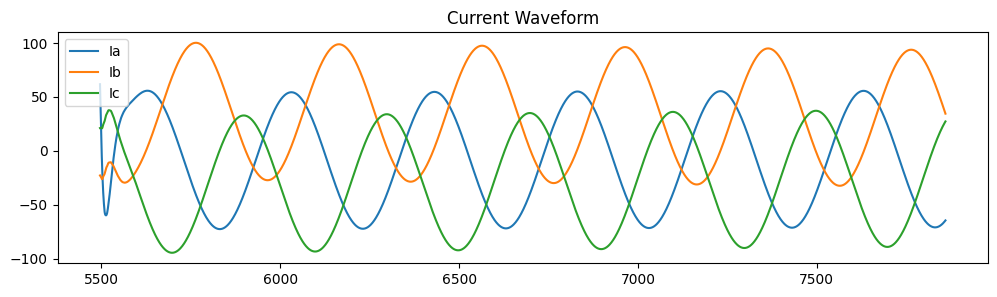

In [20]:
# Plotting the Current Values in the Dataset "df_no_fault"
plt.figure(figsize = (12,3))
plt.plot(df_no_fault["Ia"],label="Ia")
plt.plot(df_no_fault["Ib"],label="Ib")
plt.plot(df_no_fault["Ic"],label="Ic");
plt.title("Current Waveform")
plt.legend()

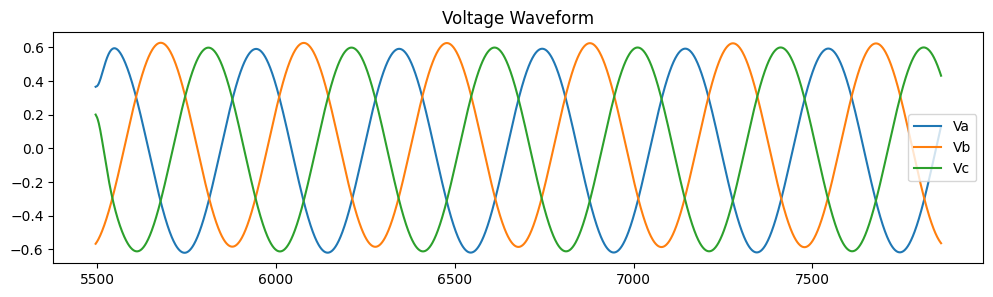

In [21]:
# Plotting the Voltage Values in the Dataset "df_no_fault"
plt.figure(figsize = (12,3))
plt.plot(df_no_fault["Va"],label="Va")
plt.plot(df_no_fault["Vb"],label="Vb")
plt.plot(df_no_fault["Vc"],label="Vc");
plt.title("Voltage Waveform")
plt.legend()

### Line to Ground Fault(LG Fault)

In [22]:
# Create an empty DataFrame to store the selected rows
df_lg = pd.DataFrame(columns=df.columns)
df_lg=df[df['Fault_Type']=="Line A to Ground Fault"]
df_lg.head()

,G,C,B,A,Ia,Ib,Ic,Va,Vb,Vc,Fault_Type
0,1,0,0,1,-151.291812,-9.677452,85.800162,0.400750,-0.132935,-0.267815,Line A to Ground Fault
1,1,0,0,1,-336.186183,-76.283262,18.328897,0.312732,-0.123633,-0.189099,Line A to Ground Fault
2,1,0,0,1,-502.891583,-174.648023,-80.924663,0.265728,-0.114301,-0.151428,Line A to Ground Fault
3,1,0,0,1,-593.941905,-217.703359,-124.891924,0.235511,-0.104940,-0.130570,Line A to Ground Fault
4,1,0,0,1,-643.663617,-224.159427,-132.282815,0.209537,-0.095554,-0.113983,Line A to Ground Fault


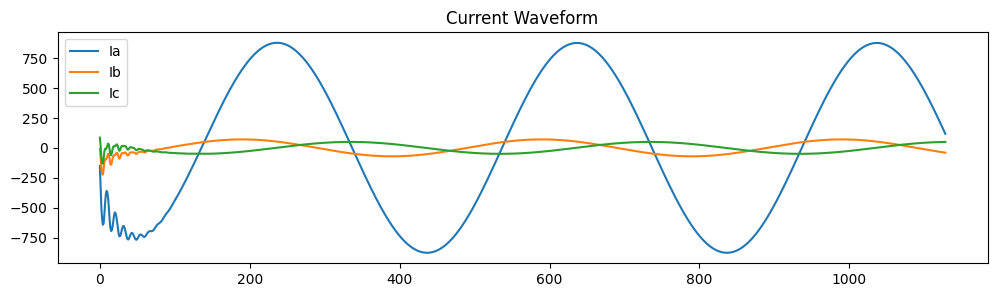

In [23]:
# Plotting the Current Values in the Dataset "df_lg"
plt.figure(figsize = (12,3))
plt.plot(df_lg["Ia"],label="Ia")
plt.plot(df_lg["Ib"],label="Ib")
plt.plot(df_lg["Ic"],label="Ic");
plt.title("Current Waveform")
plt.legend()

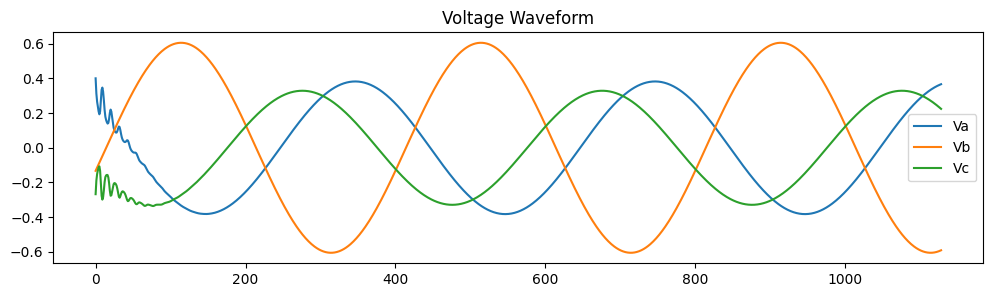

In [24]:
# Plotting the Voltage Values in the Dataset "df_lg"
plt.figure(figsize = (12,3))
plt.plot(df_lg["Va"],label="Va")
plt.plot(df_lg["Vb"],label="Vb")
plt.plot(df_lg["Vc"],label="Vc");
plt.title("Voltage Waveform")
plt.legend()

### Line to Line Fault(LL Fault)

In [15]:
# Create an empty DataFrame to store the selected rows
df_ll = pd.DataFrame(columns=df.columns)
df_ll=df[df['Fault_Type']=='Line B to Line C Fault']
df_ll.head()

,G,C,B,A,Ia,Ib,Ic,Va,Vb,Vc,Fault_Type
2263,0,1,1,0,41.764455,-93.940215,55.022192,0.517510,-0.003685,-0.513825,Line B to Line C Fault
2264,0,1,1,0,42.394348,-105.038998,65.494029,0.518491,-0.008071,-0.510420,Line B to Line C Fault
2265,0,1,1,0,43.010571,-105.734383,65.569977,0.511217,0.003798,-0.515015,Line B to Line C Fault
2266,0,1,1,0,43.612456,-100.121739,59.347319,0.499096,0.025105,-0.524201,Line B to Line C Fault
2267,0,1,1,0,44.202230,-95.078643,53.707382,0.487527,0.045052,-0.532579,Line B to Line C Fault


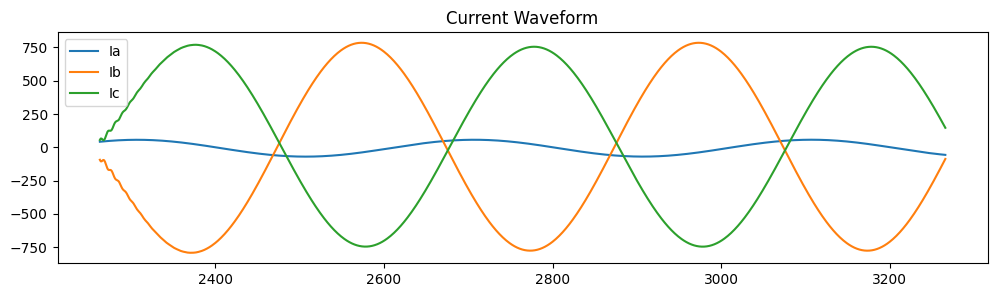

In [25]:
# Plotting the Current Values in the Dataset "df_ll"
plt.figure(figsize = (12,3))
plt.plot(df_ll["Ia"],label="Ia")
plt.plot(df_ll["Ib"],label="Ib")
plt.plot(df_ll["Ic"],label="Ic");
plt.title("Current Waveform")
plt.legend()

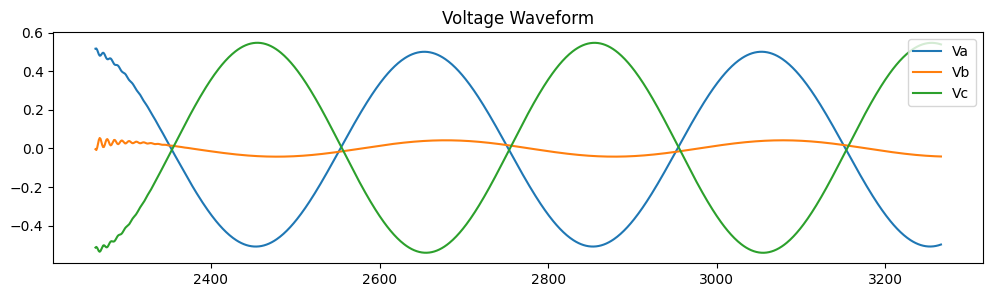

In [26]:
# Plotting the Voltage Values in the Dataset "df_ll"
plt.figure(figsize = (12,3))
plt.plot(df_ll["Va"],label="Va")
plt.plot(df_ll["Vb"],label="Vb")
plt.plot(df_ll["Vc"],label="Vc");
plt.title("Voltage Waveform")
plt.legend(loc='upper right')

### Double Line to Ground Fault(LLG Fault)

In [27]:
# Create an empty DataFrame to store the selected rows
df_llg = pd.DataFrame(columns=df.columns)
df_llg=df[df['Fault_Type']=='Line A Line B to Ground Fault']
df_llg.head()

,G,C,B,A,Ia,Ib,Ic,Va,Vb,Vc,Fault_Type
1129,1,0,1,1,-83.713374,42.102812,38.015631,0.416930,-0.066439,-0.350491,Line A Line B to Ground Fault
1130,1,0,1,1,-304.258650,243.536374,42.670680,0.097053,0.089765,-0.186818,Line A Line B to Ground Fault
1131,1,0,1,1,-487.104324,377.325956,29.573282,-0.132447,0.203226,-0.070779,Line A Line B to Ground Fault
1132,1,0,1,1,-603.543045,439.399623,9.638569,-0.248609,0.263483,-0.014873,Line A Line B to Ground Fault
1133,1,0,1,1,-620.718849,423.222790,0.613787,-0.226918,0.254651,-0.027733,Line A Line B to Ground Fault


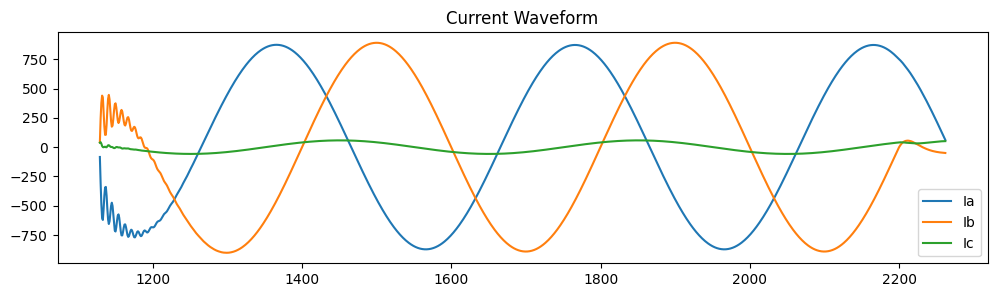

In [28]:
# Plotting the Current Values in the Dataset "df_llg"
plt.figure(figsize = (12,3))
plt.plot(df_llg["Ia"],label="Ia")
plt.plot(df_llg["Ib"],label="Ib")
plt.plot(df_llg["Ic"],label="Ic");
plt.title("Current Waveform")
plt.legend()

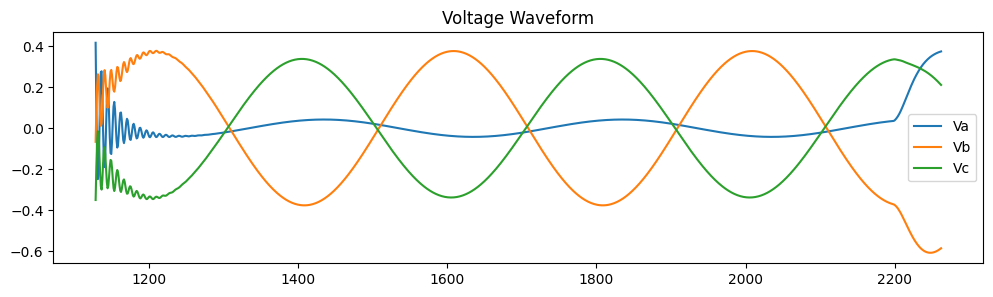

In [29]:
# Plotting the Voltage Values in the Dataset "df_llg"
plt.figure(figsize = (12,3))
plt.plot(df_llg["Va"],label="Va")
plt.plot(df_llg["Vb"],label="Vb")
plt.plot(df_llg["Vc"],label="Vc")
plt.title("Voltage Waveform")
plt.legend()

### Triple Line Fault(LLL Fault)

In [30]:
# Create an empty DataFrame to store the selected rows
df_lll = pd.DataFrame(columns=df.columns)
df_lll=df[df['Fault_Type']=='Line A Line B Line C Fault']
df_lll.head()

,G,C,B,A,Ia,Ib,Ic,Va,Vb,Vc,Fault_Type
3267,0,1,1,1,-99.274309,44.146905,57.318650,0.412305,-0.091525,-0.320781,Line A Line B Line C Fault
3268,0,1,1,1,-342.196277,218.566556,125.820753,0.095905,-0.003471,-0.092434,Line A Line B Line C Fault
3269,0,1,1,1,-526.696029,347.197345,181.689494,-0.131094,0.056790,0.074304,Line A Line B Line C Fault
3270,0,1,1,1,-633.453623,416.942091,218.702118,-0.245984,0.084683,0.161301,Line A Line B Line C Fault
3271,0,1,1,1,-639.192926,412.122656,229.260639,-0.224523,0.075580,0.148943,Line A Line B Line C Fault


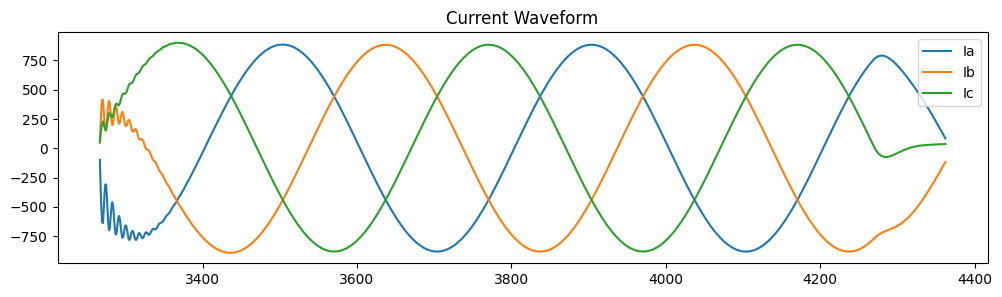

In [31]:
# Plotting the Current Values in the Dataset "df_lll"
plt.figure(figsize = (12,3))
plt.plot(df_lll["Ia"],label="Ia")
plt.plot(df_lll["Ib"],label="Ib")
plt.plot(df_lll["Ic"],label="Ic")
plt.title("Current Waveform")
plt.legend()

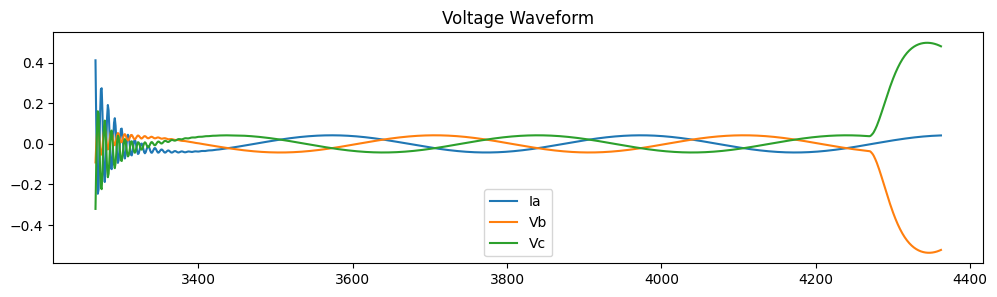

In [32]:
# Plotting the Voltage Values in the Dataset "df_lll"
plt.figure(figsize = (12,3))
plt.plot(df_lll["Va"],label="Ia")
plt.plot(df_lll["Vb"],label="Vb")
plt.plot(df_lll["Vc"],label="Vc");
plt.title("Voltage Waveform")
plt.legend()

### Triple Line to Ground fault(LLLG)

In [33]:
# Create an empty DataFrame to store the selected rows
df_lllg = pd.DataFrame(columns=df.columns)
df_lllg=df[df['Fault_Type']=='Line A Line B Line C to Ground Fault']
df_lllg.head()

,G,C,B,A,Ia,Ib,Ic,Va,Vb,Vc,Fault_Type
4363,1,1,1,1,-99.252463,52.717974,48.341534,0.410059,-0.086914,-0.323145,Line A Line B Line C to Ground Fault
4364,1,1,1,1,-342.238819,224.821345,119.149604,0.095347,-0.002326,-0.093021,Line A Line B Line C to Ground Fault
4365,1,1,1,1,-526.874012,351.614759,176.674369,-0.130437,0.055441,0.074996,Line A Line B Line C to Ground Fault
4366,1,1,1,1,-633.768916,420.246089,214.577137,-0.244709,0.082066,0.162643,Line A Line B Line C to Ground Fault
4367,1,1,1,1,-639.566896,415.329565,225.117414,-0.223359,0.073192,0.150167,Line A Line B Line C to Ground Fault


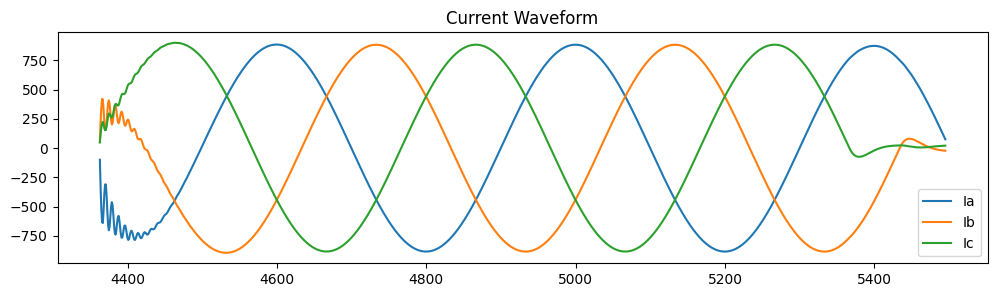

In [34]:
# Plotting the Current Values in the Dataset "df_lllg"
plt.figure(figsize = (12,3))
plt.plot(df_lllg["Ia"],label="Ia")
plt.plot(df_lllg["Ib"],label="Ib")
plt.plot(df_lllg["Ic"],label="Ic");
plt.title("Current Waveform")
plt.legend()

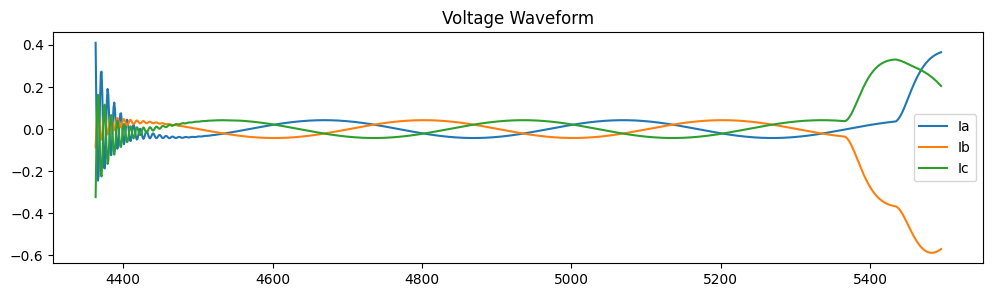

In [35]:
# Plotting the Voltage Values in the Dataset "df_lllg"
plt.figure(figsize = (12,3))
plt.plot(df_lllg["Va"],label="Ia")
plt.plot(df_lllg["Vb"],label="Ib")
plt.plot(df_lllg["Vc"],label="Ic");
plt.title("Voltage Waveform")
plt.legend()

### Train and Test Split

In [36]:
# label_encoder object knows  
# how to understand word labels. 
label_encoder = preprocessing.LabelEncoder() 

df_new=df.copy()
# Encode labels in column 'species'. 
df_new['Fault_Type']= label_encoder.fit_transform(df_new['Fault_Type']) 
  
df_new['Fault_Type'].unique() 

array([3, 2, 4, 0, 1, 5])

In [37]:
# Get the mapping of original categories to numerical values
label_mapping = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))

# Print the mapping
print(label_mapping)

{'Line A Line B Line C Fault': 0, 'Line A Line B Line C to Ground Fault': 1, 'Line A Line B to Ground Fault': 2, 'Line A to Ground Fault': 3, 'Line B to Line C Fault': 4, 'NO Fault': 5}


In [38]:
df_new.head()

,G,C,B,A,Ia,Ib,Ic,Va,Vb,Vc,Fault_Type
0,1,0,0,1,-151.291812,-9.677452,85.800162,0.400750,-0.132935,-0.267815,3
1,1,0,0,1,-336.186183,-76.283262,18.328897,0.312732,-0.123633,-0.189099,3
2,1,0,0,1,-502.891583,-174.648023,-80.924663,0.265728,-0.114301,-0.151428,3
3,1,0,0,1,-593.941905,-217.703359,-124.891924,0.235511,-0.104940,-0.130570,3
4,1,0,0,1,-643.663617,-224.159427,-132.282815,0.209537,-0.095554,-0.113983,3


In [39]:
X= df_new.drop(['Fault_Type','G','C','B','A'],axis=1)
Y=df_new['Fault_Type']

In [40]:
# Train Test Split 
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=.20,random_state=30)

In [41]:
X_train.shape

(6288, 6)

In [42]:
X_test.shape

(1573, 6)

# Model Selection

## Logistic Regression

In [43]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

logmodel1 = LogisticRegression()
logmodel1.fit(X_train,Y_train)

LogisticRegression()

In [44]:
predlog1 = logmodel1.predict(X_test)
print('Accuracy: {:.2f}'.format(accuracy_score(Y_test, predlog1)))

Accuracy: 0.34


### Apply Scaling (It may Improve Accuracy of the Model)

In [45]:
"""scaling of train and test data for better optimization, due to scaling gradient descent can find 
much more direct path to the """

# global minima
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()

scaler = sc.fit(X)
trainX_scaled = scaler.transform(X_train)
testX_scaled = scaler.transform(X_test)

In [46]:
logmodel2 = LogisticRegression()
logmodel2.fit(trainX_scaled,Y_train)

LogisticRegression()

In [47]:
predlog2 = logmodel2.predict(testX_scaled)
print('Accuracy: {:.2f}'.format(accuracy_score(Y_test, predlog2)))

Accuracy: 0.34


In [48]:
np.linspace(0.1, 1.0, 10)

array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ])

### Learning Curve for Logistic Regression

We typically use the training set (X_train and Y_train) to generate the learning curve. The idea is to observe how the model's performance changes as you increase the size of the training set.

<Figure size 800x500 with 0 Axes>

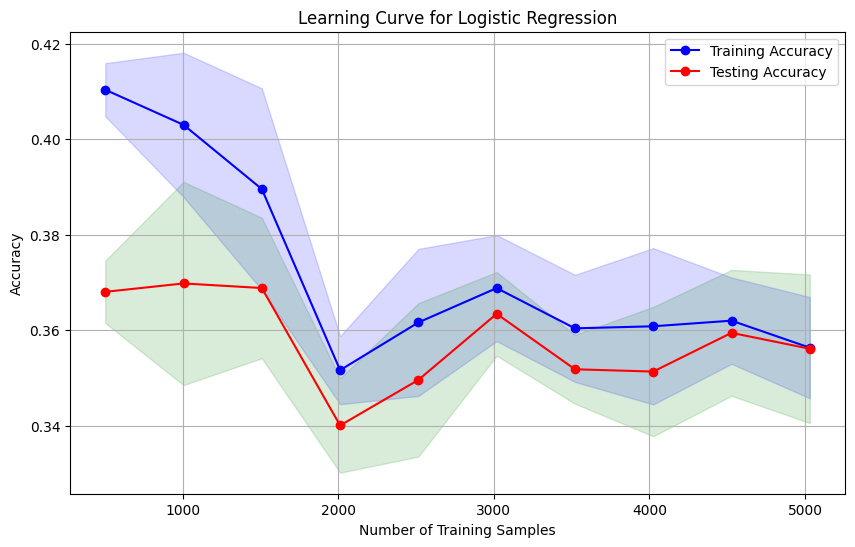

In [49]:
from sklearn.model_selection import learning_curve

# Use learning_curve to get training and testing scores at different training set sizes
train_sizes, train_scores, test_scores = learning_curve(
    logmodel1, X_train, Y_train, cv=5, scoring='accuracy', train_sizes=np.linspace(0.1, 1.0, 10)
)

# Calculate mean and standard deviation of training and testing scores
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# Set a smaller figure size
plt.figure(figsize=(8, 5))

# Plot the learning curve
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_mean, marker='o', color='b', label='Training Accuracy')
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.15, color='b')

plt.plot(train_sizes, test_mean, marker='o', color='r', label='Testing Accuracy')
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, alpha=0.15, color='g')

# Add labels and title
plt.xlabel('Number of Training Samples')
plt.ylabel('Accuracy')
plt.title('Learning Curve for Logistic Regression')
plt.legend()
plt.grid(True)
plt.show()

### Evaluation

In [50]:
from sklearn.metrics import classification_report

In [51]:
print(classification_report(Y_test,predlog2))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       223
           1       0.27      0.17      0.21       213
           2       1.00      0.15      0.26       219
           3       0.00      0.00      0.00       227
           4       0.00      0.00      0.00       223
           5       0.33      1.00      0.50       468

    accuracy                           0.34      1573
   macro avg       0.27      0.22      0.16      1573
weighted avg       0.28      0.34      0.21      1573



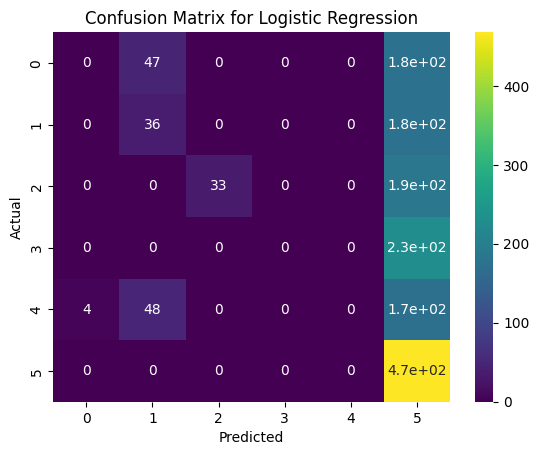

In [52]:
from sklearn.metrics import confusion_matrix

# When Ever we have any Kind of table we can represent
# it using Heat Map
sns.heatmap(confusion_matrix(Y_test,predlog2),annot=True,cmap='viridis')

plt.title("Confusion Matrix for Logistic Regression")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [53]:
from sklearn.preprocessing import label_binarize
Y_r = label_binarize(Y, classes=[0, 1, 2, 3, 4, 5])
Y_r.shape[1]

6

Plotting the Receiver Operating Characteristic (ROC) curve for a multi-class classification problem involves using a one-vs-all or one-vs-one strategy, depending on the classifier you are using. Here's a general guide on how to plot the ROC curve for a multi-class classification problem using the one-vs-all strategy:

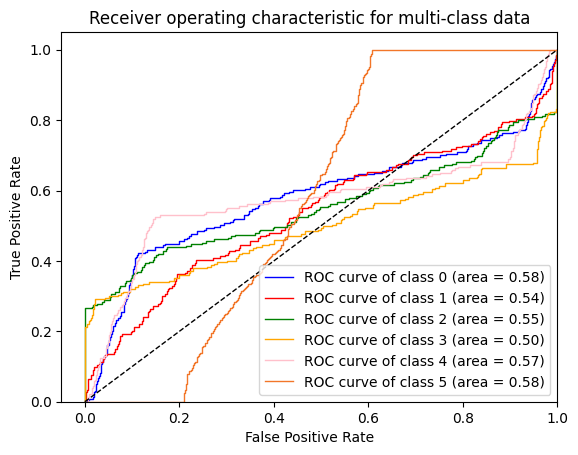

In [56]:
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc
from sklearn.multiclass import OneVsRestClassifier
from itertools import cycle

# Binarize the output
Y_r = label_binarize(Y, classes=[0, 1, 2, 3, 4, 5])
n_classes = Y_r.shape[1]


X_train_r, X_test_r, Y_train_r, Y_test_r = train_test_split(X, Y_r, test_size=0.2, random_state=30)

classifier = OneVsRestClassifier(LogisticRegression())

Y_score_r = classifier.fit(scaler.transform(X_train_r), Y_train_r).predict_proba(scaler.transform(X_test_r)) # Use predict_proba for probability scores

fpr = dict()
tpr = dict()
roc_auc = dict()
lw = 1

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(Y_test_r[:, i], Y_score_r[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

colors = cycle(['blue', 'red', 'green','orange','pink','#f27629'])

for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([-0.05, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic for multi-class data')
plt.legend(loc="lower right")
plt.show()

## K-Nearest Neighbour(KNN)

Because the KNN classifier predicts the class of a given test observation by identifying the observations that are nearest to it, the scale of the variables matters. Any variables that are on a large scale will have a much larger effect on the distance between the observations, and hence on the KNN classifier, than variables that are on a small scale.

In [57]:
from sklearn.neighbors import KNeighborsClassifier

# Here we take only one Nearest Neighbour
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(trainX_scaled,Y_train)
pred_knn = knn.predict(testX_scaled)

In [58]:
print('Accuracy: {:.2f}'.format(accuracy_score(Y_test, pred_knn)))


Accuracy: 0.89


### Learning Curve for KNN

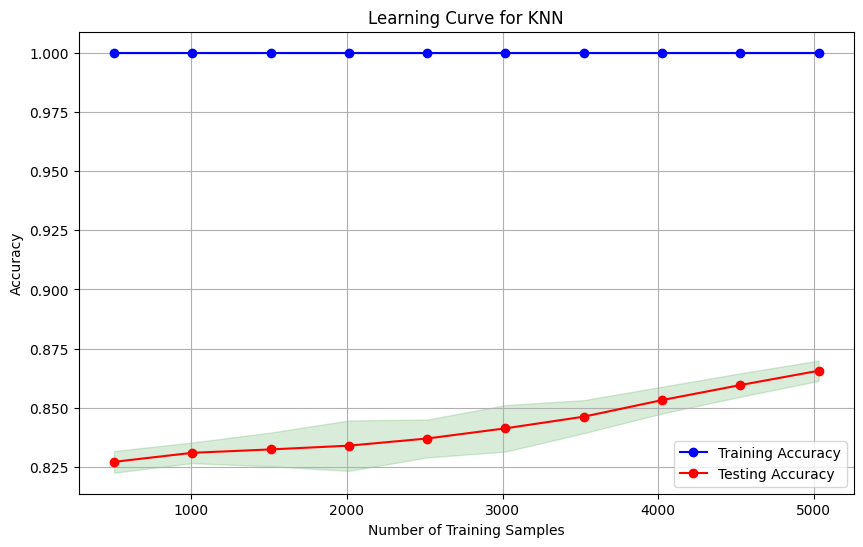

In [59]:
from sklearn.model_selection import learning_curve

# Use learning_curve to get training and testing scores at different training set sizes
train_sizes, train_scores, test_scores = learning_curve(
    knn, trainX_scaled, Y_train, cv=5, scoring='accuracy', train_sizes=np.linspace(0.1,1,10)
)

# Calculate mean and standard deviation of training and testing scores
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# Plot the learning curve
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_mean, marker='o', color='b', label='Training Accuracy')
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.15, color='b')

plt.plot(train_sizes, test_mean, marker='o', color='r', label='Testing Accuracy')
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, alpha=0.15, color='g')

# Add labels and title
plt.xlabel('Number of Training Samples')
plt.ylabel('Accuracy')
plt.title('Learning Curve for KNN')
plt.legend()
plt.grid(True)
plt.show()

### Evaluation

In [60]:
print(classification_report(Y_test,pred_knn))

              precision    recall  f1-score   support

           0       0.63      0.67      0.65       223
           1       0.63      0.59      0.61       213
           2       1.00      0.97      0.98       219
           3       0.97      1.00      0.98       227
           4       1.00      1.00      1.00       223
           5       1.00      1.00      1.00       468

    accuracy                           0.89      1573
   macro avg       0.87      0.87      0.87      1573
weighted avg       0.89      0.89      0.89      1573



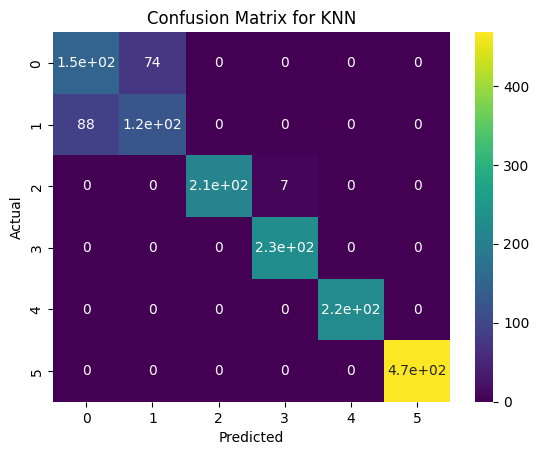

In [61]:
# When Ever we have any Kind of table we can represent
# it using Heat Map
conf_matrix=confusion_matrix(Y_test,pred_knn)
sns.heatmap(conf_matrix,annot=True,cmap='viridis')

plt.title("Confusion Matrix for KNN")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

### Try to Improve Accuracy By Increasing the Value of "K"

In [62]:
error_rate = []

for i in range(1,30):
    
    knn_hyper = KNeighborsClassifier(n_neighbors=i)
    knn_hyper.fit(trainX_scaled,Y_train)
    pred_i = knn_hyper.predict(testX_scaled)
    
  # error_rate.append(np.mean(pred_i != y_test))
    
    # OR
    
    m=pred_i != Y_test
    error_rate.append(np.mean(m))

### From Graph It can Clearly observe that at K=1, that is for One Nearest Neighbour We will get Minimum Error

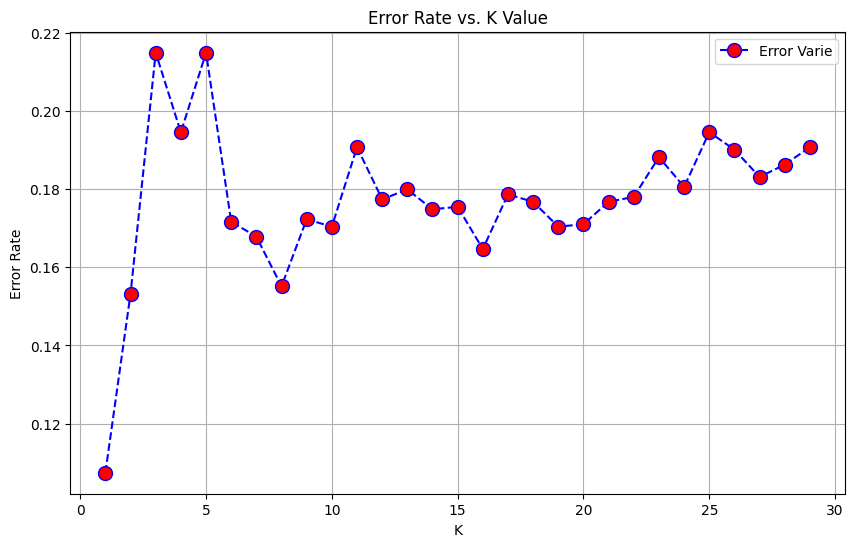

In [63]:
plt.figure(figsize=(10,6))

#plt.plot(x-value,y-value,color='blue',......)
         
plt.plot(range(1,30),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10,label="Error Varie")
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')
plt.grid(True)
plt.legend()

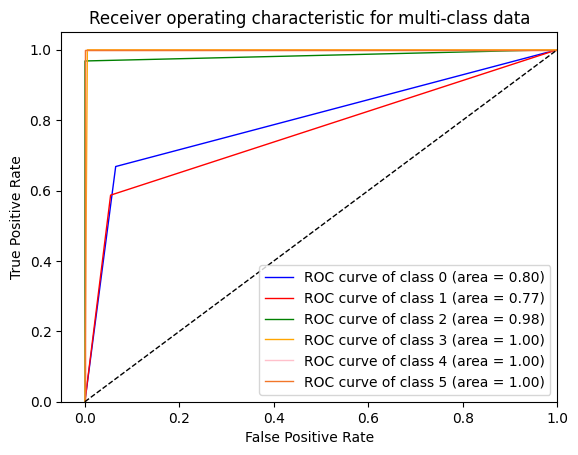

In [64]:
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc
from sklearn.multiclass import OneVsRestClassifier
from itertools import cycle

# Binarize the output
Y_r_knn = label_binarize(Y, classes=[0, 1, 2, 3, 4, 5])
n_classes = Y_r_knn.shape[1]


X_train_r_knn, X_test_r_knn, Y_train_r_knn, Y_test_r_knn = train_test_split(X, Y_r_knn, test_size=0.2, random_state=30)

classifier = OneVsRestClassifier(KNeighborsClassifier(n_neighbors=1))

Y_score_r_knn = classifier.fit(scaler.transform(X_train_r_knn), Y_train_r_knn).predict_proba(scaler.transform(X_test_r_knn))  # Use predict_proba for probability scores

fpr = dict()
tpr = dict()
roc_auc = dict()
lw = 1

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(Y_test_r_knn[:, i], Y_score_r_knn[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

colors = cycle(['blue', 'red', 'green','orange','pink','#f27629'])

for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([-0.05, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic for multi-class data')
plt.legend(loc="lower right")
plt.show()

## Support Vector Machine(SVM)

In [65]:
from sklearn.svm import SVC
# Create an SVM classifier with the default RBF kernel
svm = SVC()
svm.fit(trainX_scaled,Y_train)
pred_svm = svm.predict(testX_scaled)

In [66]:
print('Accuracy: {:.2f}'.format(accuracy_score(Y_test, pred_svm)))

Accuracy: 0.80


### Learning Curve for SVM

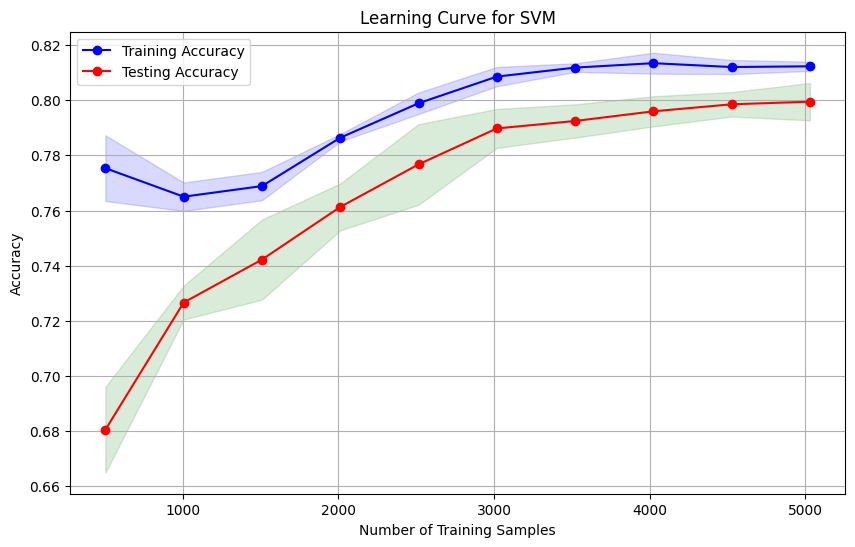

In [67]:
from sklearn.model_selection import learning_curve

# Use learning_curve to get training and testing scores at different training set sizes
train_sizes, train_scores, test_scores = learning_curve(
    svm, trainX_scaled, Y_train, cv=5, scoring='accuracy', train_sizes=np.linspace(0.1, 1.0, 10)
)

# Calculate mean and standard deviation of training and testing scores
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# Plot the learning curve
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_mean, marker='o', color='b', label='Training Accuracy')
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.15, color='b')

plt.plot(train_sizes, test_mean, marker='o', color='r', label='Testing Accuracy')
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, alpha=0.15, color='g')

# Add labels and title
plt.xlabel('Number of Training Samples')
plt.ylabel('Accuracy')
plt.title('Learning Curve for SVM')
plt.legend()
plt.grid(True)
plt.show()

In [64]:
print(classification_report(Y_test,pred_svm))

              precision    recall  f1-score   support

           0       0.47      0.33      0.39       223
           1       0.41      0.55      0.47       213
           2       0.93      0.96      0.95       219
           3       0.95      0.93      0.94       227
           4       1.00      0.79      0.88       223
           5       0.92      1.00      0.96       468

    accuracy                           0.80      1573
   macro avg       0.78      0.76      0.76      1573
weighted avg       0.81      0.80      0.80      1573



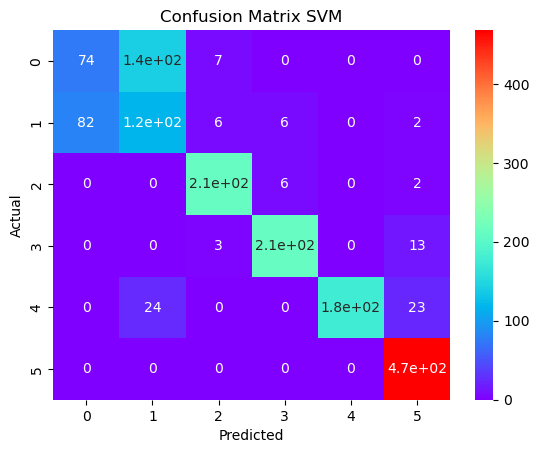

In [65]:
# When Ever we have any Kind of table we can represent
# it using Heat Map
conf_matrix=confusion_matrix(Y_test,pred_svm)
sns.heatmap(conf_matrix,annot=True,cmap='rainbow')

plt.title("Confusion Matrix SVM")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

### Default Kernal for SVM() is "rbf"

In [66]:
kernels = ['rbf', 'poly']

for kernel in kernels:
    model = SVC(kernel=kernel)
    model.fit(trainX_scaled, Y_train)
    predictions_new = model.predict(testX_scaled)
    print("Accuracy using {}:".format(kernel), accuracy_score(Y_test,predictions_new))

Accuracy using rbf: 0.7991099809281628
Accuracy using poly: 0.6261919898283534


In [67]:
model_poly = SVC(kernel='poly',degree=10)
model_poly.fit(trainX_scaled, Y_train)
predictions_new_poly = model_poly.predict(testX_scaled)
print("Accuracy using {}:".format(kernel), accuracy_score(Y_test,predictions_new_poly))

Accuracy using poly: 0.8321678321678322


### Try to Improve Accuracy(Apply Grid Search)

### Hyper Parameter Tunning

In [68]:
param_grid_svm = {'C':[1,10,100],'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 'kernel': ['rbf']}

"verbose=3" will produce more detailed output during the grid search process, and "refit=True" will fit the best estimator on the entire training dataset once the grid search is complete.

In [69]:
from sklearn.model_selection import GridSearchCV
grid_svm = GridSearchCV(SVC(),param_grid_svm,refit=True,verbose=3)

In [70]:
grid_svm.fit(trainX_scaled,Y_train)

Fitting 5 folds for each of 15 candidates, totalling 75 fits


[CV 1/5] END ..........C=1, gamma=1, kernel=rbf;, score=0.827 total time=   1.0s
[CV 2/5] END ..........C=1, gamma=1, kernel=rbf;, score=0.828 total time=   0.8s
[CV 3/5] END ..........C=1, gamma=1, kernel=rbf;, score=0.833 total time=   0.8s
[CV 4/5] END ..........C=1, gamma=1, kernel=rbf;, score=0.821 total time=   0.9s
[CV 5/5] END ..........C=1, gamma=1, kernel=rbf;, score=0.825 total time=   0.8s
[CV 1/5] END ........C=1, gamma=0.1, kernel=rbf;, score=0.797 total time=   1.0s
[CV 2/5] END ........C=1, gamma=0.1, kernel=rbf;, score=0.781 total time=   0.9s
[CV 3/5] END ........C=1, gamma=0.1, kernel=rbf;, score=0.782 total time=   0.9s
[CV 4/5] END ........C=1, gamma=0.1, kernel=rbf;, score=0.791 total time=   1.1s
[CV 5/5] END ........C=1, gamma=0.1, kernel=rbf;, score=0.785 total time=   0.8s
[CV 1/5] END .......C=1, gamma=0.01, kernel=rbf;, score=0.626 total time=   1.9s
[CV 2/5] END .......C=1, gamma=0.01, kernel=rbf;, score=0.619 total time=   2.0s
[CV 3/5] END .......C=1, gam

GridSearchCV(estimator=SVC(),
             param_grid={'C': [1, 10, 100],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']},
             verbose=3)

In [71]:
grid_svm.best_params_

{'C': 100, 'gamma': 0.1, 'kernel': 'rbf'}

In [72]:
grid_svm.best_estimator_

SVC(C=100, gamma=0.1)

In [73]:
grid_predictions_svm = grid_svm.predict(testX_scaled)

In [74]:
print(classification_report(Y_test,grid_predictions_svm))

              precision    recall  f1-score   support

           0       0.50      0.42      0.46       223
           1       0.48      0.56      0.52       213
           2       0.99      0.97      0.98       219
           3       0.97      1.00      0.98       227
           4       1.00      1.00      1.00       223
           5       1.00      1.00      1.00       468

    accuracy                           0.85      1573
   macro avg       0.82      0.82      0.82      1573
weighted avg       0.85      0.85      0.85      1573



### Learning Curve for SVM

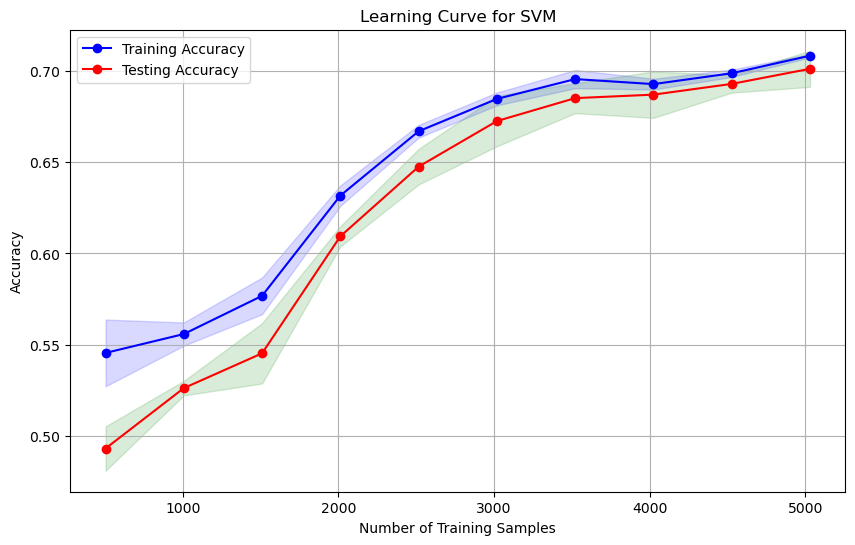

In [75]:
from sklearn.model_selection import learning_curve

model_learning = SVC(kernel='rbf',gamma=0.001,C=100)

# Use learning_curve to get training and testing scores at different training set sizes
train_sizes, train_scores, test_scores = learning_curve(
    model_learning, trainX_scaled, Y_train, cv=5, scoring='accuracy', train_sizes=np.linspace(0.1, 1.0, 10)
)

# Calculate mean and standard deviation of training and testing scores
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# Plot the learning curve
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_mean, marker='o', color='b', label='Training Accuracy')
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.15, color='b')

plt.plot(train_sizes, test_mean, marker='o', color='r', label='Testing Accuracy')
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, alpha=0.15, color='g')

# Add labels and title
plt.xlabel('Number of Training Samples')
plt.ylabel('Accuracy')
plt.title('Learning Curve for SVM')
plt.legend()
plt.grid(True)
plt.show()

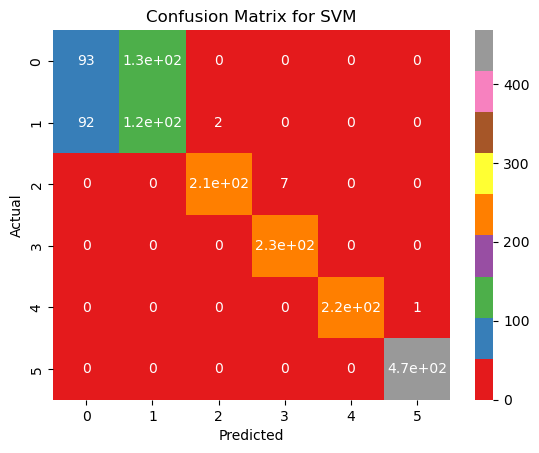

In [76]:
# When Ever we have any Kind of table we can represent
# it using Heat Map
conf_matrix=confusion_matrix(Y_test,grid_predictions_svm)
sns.heatmap(conf_matrix,annot=True,cmap='Set1')

plt.title("Confusion Matrix for SVM")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

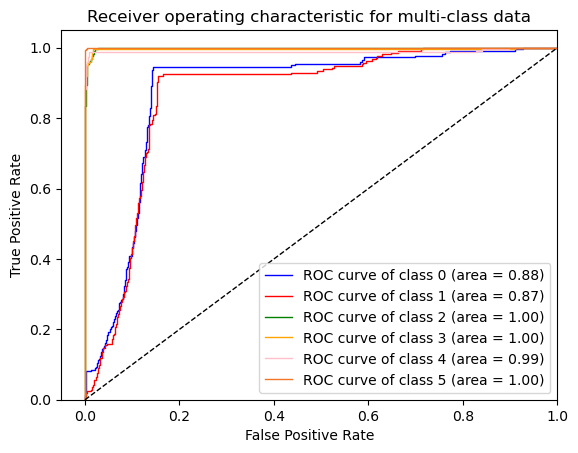

In [77]:
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc
from sklearn.multiclass import OneVsRestClassifier
from itertools import cycle

# Binarize the output
Y_r_svm = label_binarize(Y, classes=[0, 1, 2, 3, 4, 5])
n_classes = Y_r_svm.shape[1]


X_train_r_svm, X_test_r_svm, Y_train_r_svm, Y_test_r_svm = train_test_split(X, Y_r_svm, test_size=0.2, random_state=30)

classifier = OneVsRestClassifier(SVC(kernel='rbf',gamma=0.0001,probability=True))

Y_score_r_svm = classifier.fit(X_train_r_svm, Y_train_r_svm).decision_function(X_test_r_svm)

fpr = dict()
tpr = dict()
roc_auc = dict()
lw = 1

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(Y_test_r_svm[:, i], Y_score_r_svm[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

colors = cycle(['blue', 'red', 'green','orange','pink','#f27629'])

for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([-0.05, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic for multi-class data')
plt.legend(loc="lower right")
plt.show()

## Decision Tree Classifier

In [78]:
from sklearn.tree import DecisionTreeClassifier

In [79]:
dtree = DecisionTreeClassifier()
dtree.fit(trainX_scaled,Y_train)
predictions_dt = dtree.predict(testX_scaled)

In [80]:
print('Accuracy: {:.2f}'.format(accuracy_score(Y_test, predictions_dt)))

Accuracy: 0.90


### Learning Curve for Decision Tree

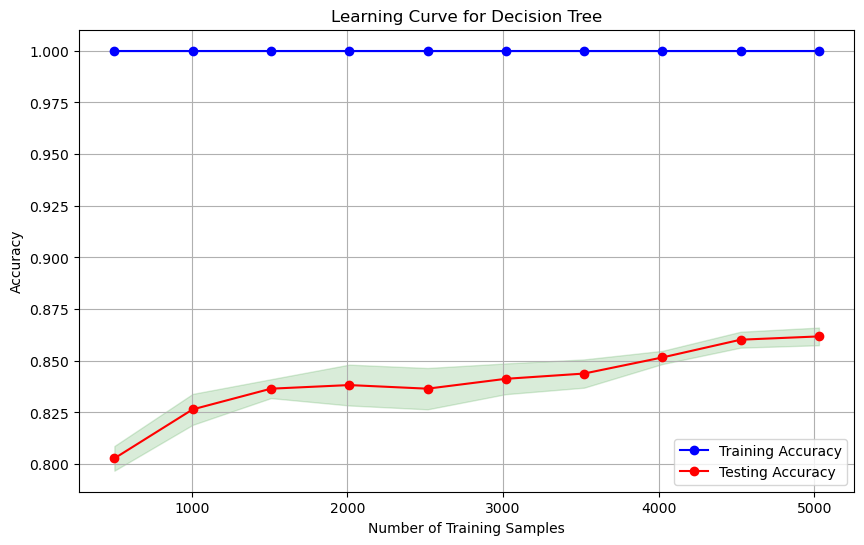

In [81]:
from sklearn.model_selection import learning_curve


# Use learning_curve to get training and testing scores at different training set sizes
train_sizes, train_scores, test_scores = learning_curve(
    dtree, trainX_scaled, Y_train, cv=5, scoring='accuracy', train_sizes=np.linspace(0.1, 1.0, 10)
)

# Calculate mean and standard deviation of training and testing scores
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# Plot the learning curve
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_mean, marker='o', color='b', label='Training Accuracy')
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.15, color='b')

plt.plot(train_sizes, test_mean, marker='o', color='r', label='Testing Accuracy')
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, alpha=0.15, color='g')

# Add labels and title
plt.xlabel('Number of Training Samples')
plt.ylabel('Accuracy')
plt.title('Learning Curve for Decision Tree')
plt.legend()
plt.grid(True)
plt.show()

In [82]:
print(classification_report(Y_test,predictions_dt))

              precision    recall  f1-score   support

           0       0.63      0.67      0.65       223
           1       0.62      0.59      0.61       213
           2       1.00      0.99      0.99       219
           3       1.00      1.00      1.00       227
           4       1.00      1.00      1.00       223
           5       1.00      1.00      1.00       468

    accuracy                           0.90      1573
   macro avg       0.87      0.87      0.87      1573
weighted avg       0.90      0.90      0.90      1573



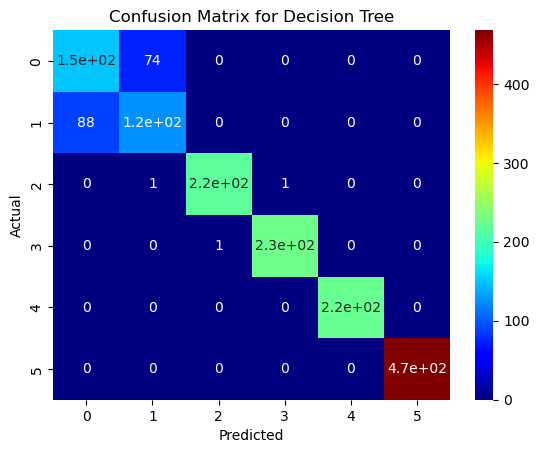

In [83]:
# When Ever we have any Kind of table we can represent
# it using Heat Map
conf_matrix=confusion_matrix(Y_test,predictions_dt)
sns.heatmap(conf_matrix,annot=True,cmap='jet')

plt.title("Confusion Matrix for Decision Tree")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

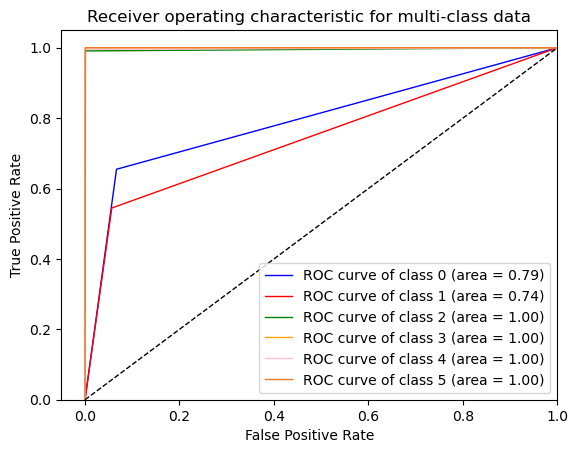

In [84]:
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc
from sklearn.multiclass import OneVsRestClassifier
from itertools import cycle

# Binarize the output
Y_r_dt = label_binarize(Y, classes=[0, 1, 2, 3, 4, 5])
n_classes = Y_r_dt.shape[1]


X_train_r_dt, X_test_r_dt, Y_train_r_dt, Y_test_r_dt = train_test_split(X, Y_r_dt, test_size=0.2, random_state=30)

classifier = OneVsRestClassifier(DecisionTreeClassifier())

Y_score_r_dt = classifier.fit(X_train_r_dt, Y_train_r_dt).predict_proba(X_test_r_dt)  # Use predict_proba for probability scores

fpr = dict()
tpr = dict()
roc_auc = dict()
lw = 1

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(Y_test_r_dt[:, i], Y_score_r_dt[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

colors = cycle(['blue', 'red', 'green','orange','pink','#f27629'])

for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([-0.05, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic for multi-class data')
plt.legend(loc="lower right")
plt.show()

### Try to Improve Accuracy

### Hyper Parameter Tunning

In [85]:
acc=[]
for i in range (30,100):
    dtree = DecisionTreeClassifier(max_depth=i)
    dtree.fit(trainX_scaled,Y_train)
    predictions_dt = dtree.predict(testX_scaled)
    acc.append(accuracy_score(Y_test, predictions_dt))
    

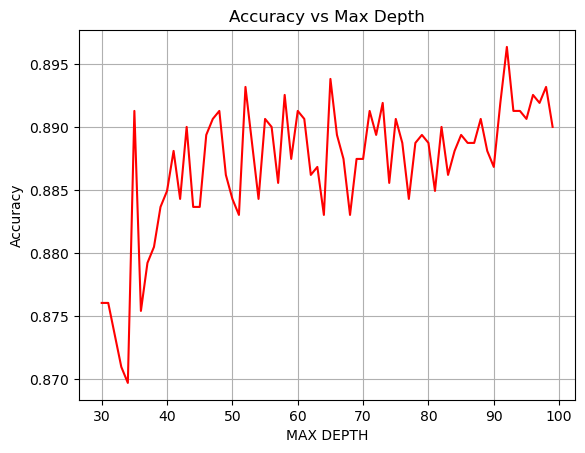

In [86]:
plt.plot(range(30,100),acc,color='red')
plt.title('Accuracy vs Max Depth')
plt.xlabel('MAX DEPTH')
plt.ylabel('Accuracy')
plt.grid(True)

In [87]:
## Preprunning

# "log_loss" mainly used for binary Classifiaction
# Default Value is Gini
parameter={
  'criterion':['gini','entropy'],
  'splitter':['best','random'],
  'max_depth':[70,80,100,120,140],
  'min_samples_leaf':[1,2,3,4],
  'max_features':['auto', 'sqrt', 'log2'] 
}

In [88]:
# Define the Model
treemodel_dt=DecisionTreeClassifier()

# Apply Grid Search
grid_dt=GridSearchCV(treemodel_dt,param_grid=parameter,scoring='accuracy',refit=True,verbose=3)
grid_dt.fit(X_train,Y_train)

Fitting 5 folds for each of 240 candidates, totalling 1200 fits
[CV 1/5] END criterion=gini, max_depth=70, max_features=auto, min_samples_leaf=1, splitter=best;, score=nan total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=70, max_features=auto, min_samples_leaf=1, splitter=best;, score=nan total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=70, max_features=auto, min_samples_leaf=1, splitter=best;, score=nan total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=70, max_features=auto, min_samples_leaf=1, splitter=best;, score=nan total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=70, max_features=auto, min_samples_leaf=1, splitter=best;, score=nan total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=70, max_features=auto, min_samples_leaf=1, splitter=random;, score=nan total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=70, max_features=auto, min_samples_leaf=1, splitter=random;, score=nan total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=70, 

GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [70, 80, 100, 120, 140],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 3, 4],
                         'splitter': ['best', 'random']},
             scoring='accuracy', verbose=3)

In [89]:
grid_dt.best_params_

{'criterion': 'entropy',
 'max_depth': 100,
 'max_features': 'log2',
 'min_samples_leaf': 1,
 'splitter': 'best'}

In [90]:
grid_dt.best_estimator_

DecisionTreeClassifier(criterion='entropy', max_depth=100, max_features='log2')

In [91]:
grid_predictions_dt = grid_dt.predict(X_test)
print(classification_report(Y_test,grid_predictions_dt))

              precision    recall  f1-score   support

           0       0.57      0.72      0.63       223
           1       0.57      0.42      0.48       213
           2       1.00      0.99      0.99       219
           3       1.00      1.00      1.00       227
           4       1.00      0.99      1.00       223
           5       1.00      1.00      1.00       468

    accuracy                           0.88      1573
   macro avg       0.86      0.85      0.85      1573
weighted avg       0.88      0.88      0.88      1573



## Random Forest

In [92]:
from sklearn.ensemble import RandomForestClassifier

In [93]:
# "n_estimators" are Basically Number of Decision Tree 
rfc = RandomForestClassifier(n_estimators=100)

In [94]:
rfc.fit(trainX_scaled,Y_train)

RandomForestClassifier()

In [95]:
predictions_rfc = rfc.predict(testX_scaled)
print(classification_report(Y_test,predictions_rfc))

              precision    recall  f1-score   support

           0       0.56      0.61      0.59       223
           1       0.55      0.51      0.53       213
           2       1.00      1.00      1.00       219
           3       1.00      1.00      1.00       227
           4       1.00      1.00      1.00       223
           5       1.00      1.00      1.00       468

    accuracy                           0.88      1573
   macro avg       0.85      0.85      0.85      1573
weighted avg       0.88      0.88      0.88      1573



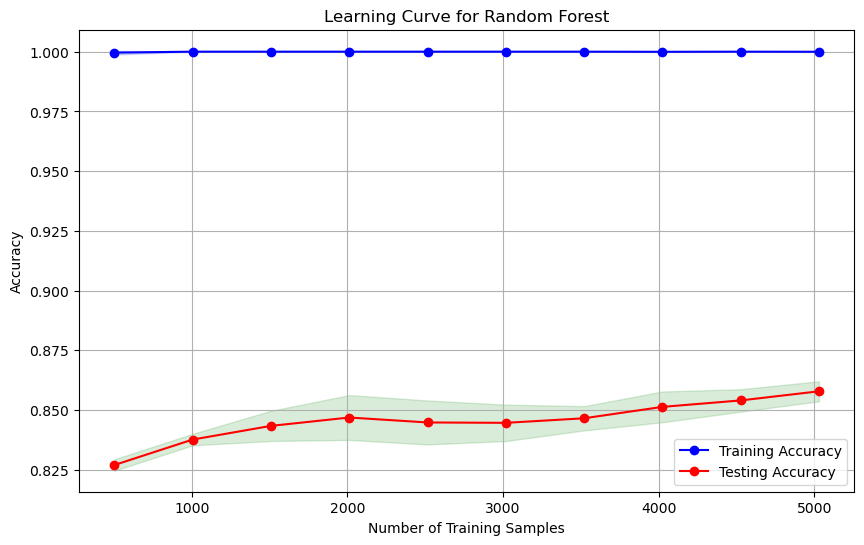

In [96]:
from sklearn.model_selection import learning_curve

# Use learning_curve to get training and testing scores at different training set sizes
train_sizes, train_scores, test_scores = learning_curve(
    rfc, trainX_scaled, Y_train, cv=5, scoring='accuracy', train_sizes=np.linspace(0.1, 1.0, 10)
)

# Calculate mean and standard deviation of training and testing scores
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# Plot the learning curve
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_mean, marker='o', color='b', label='Training Accuracy')
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.15, color='b')

plt.plot(train_sizes, test_mean, marker='o', color='r', label='Testing Accuracy')
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, alpha=0.15, color='g')

# Add labels and title
plt.xlabel('Number of Training Samples')
plt.ylabel('Accuracy')
plt.title('Learning Curve for Random Forest')
plt.legend()
plt.grid(True)
plt.show()

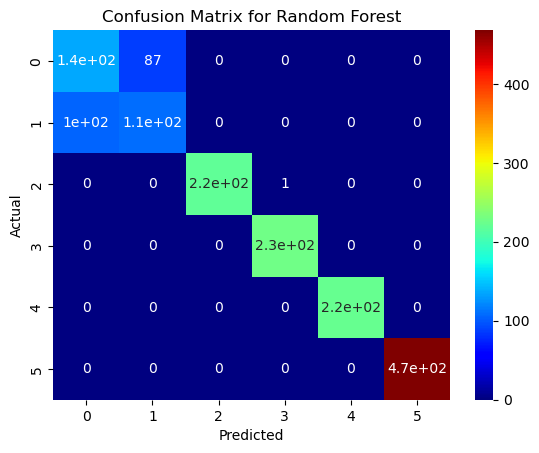

In [97]:
# When Ever we have any Kind of table we can represent
# it using Heat Map
conf_matrix=confusion_matrix(Y_test,predictions_rfc)
sns.heatmap(conf_matrix,annot=True,cmap='jet')

plt.title("Confusion Matrix for Random Forest")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

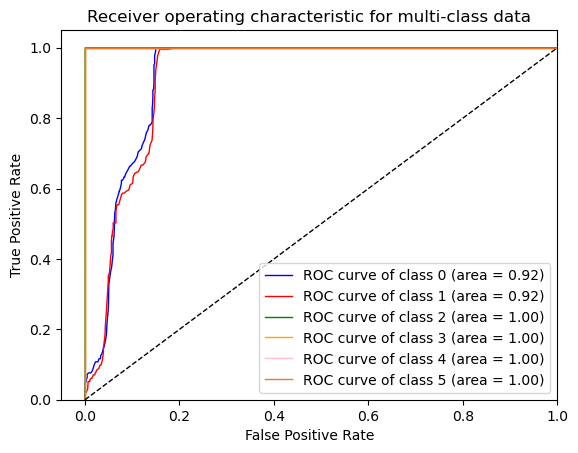

In [98]:
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc
from sklearn.multiclass import OneVsRestClassifier
from itertools import cycle

# Binarize the output
Y_r_rfc = label_binarize(Y, classes=[0, 1, 2, 3, 4, 5])
n_classes = Y_r_rfc.shape[1]


X_train_r_rfc, X_test_r_rfc, Y_train_r_rfc, Y_test_r_rfc = train_test_split(X, Y_r_rfc, test_size=0.2, random_state=30)

classifier = OneVsRestClassifier(RandomForestClassifier(n_estimators=100))

Y_score_r_rfc = classifier.fit(X_train_r_rfc, Y_train_r_rfc).predict_proba(X_test_r_rfc)  # Use predict_proba for probability scores

fpr = dict()
tpr = dict()
roc_auc = dict()
lw = 1

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(Y_test_r_rfc[:, i], Y_score_r_rfc[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

colors = cycle(['blue', 'red', 'green','orange','pink','#f27629'])

for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([-0.05, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic for multi-class data')
plt.legend(loc="lower right")
plt.show()

## Adaboost Classifier (Boosting Technique)

In [99]:
# Import the AdaBoost classifier
from sklearn.ensemble import AdaBoostClassifier

# Create adaboost classifer object
abc = AdaBoostClassifier(n_estimators=100, learning_rate=1, random_state=0)

# Train Adaboost Classifer
model_adb = abc.fit(trainX_scaled, Y_train)

#Predict the response for test dataset
pred_adb = model_adb.predict(testX_scaled)

In [100]:
print("AdaBoost Classifier Model Accuracy:", accuracy_score(Y_test, pred_adb))

AdaBoost Classifier Model Accuracy: 0.7062937062937062


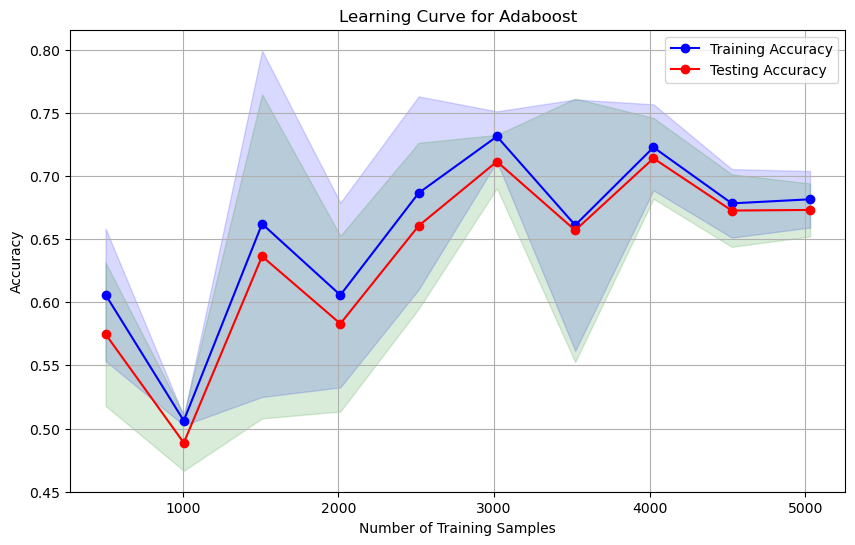

In [101]:
from sklearn.model_selection import learning_curve


# Use learning_curve to get training and testing scores at different training set sizes
train_sizes, train_scores, test_scores = learning_curve(
        abc, trainX_scaled, Y_train, cv=5, scoring='accuracy', train_sizes=np.linspace(0.1, 1.0, 10)
)

# Calculate mean and standard deviation of training and testing scores
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# Plot the learning curve
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_mean, marker='o', color='b', label='Training Accuracy')
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.15, color='b')

plt.plot(train_sizes, test_mean, marker='o', color='r', label='Testing Accuracy')
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, alpha=0.15, color='g')

# Add labels and title
plt.xlabel('Number of Training Samples')
plt.ylabel('Accuracy')
plt.title('Learning Curve for Adaboost')
plt.legend()
plt.grid(True)
plt.show()

In [102]:
print(classification_report(Y_test,pred_adb))

              precision    recall  f1-score   support

           0       0.55      0.13      0.22       223
           1       0.50      0.72      0.59       213
           2       0.48      0.93      0.63       219
           3       0.78      0.20      0.32       227
           4       0.91      0.95      0.93       223
           5       0.93      1.00      0.97       468

    accuracy                           0.71      1573
   macro avg       0.69      0.65      0.61      1573
weighted avg       0.73      0.71      0.66      1573



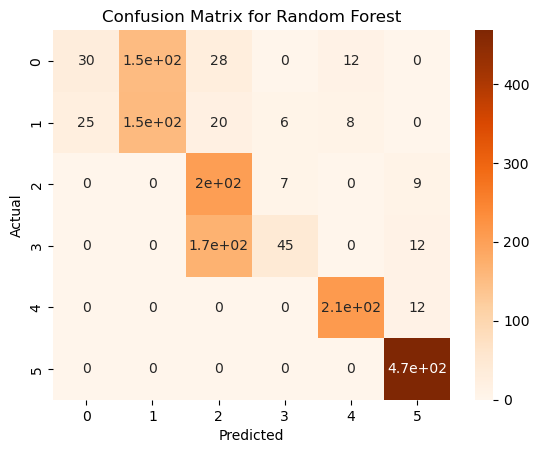

In [103]:
# When Ever we have any Kind of table we can represent
# it using Heat Map
conf_matrix=confusion_matrix(Y_test,pred_adb)
sns.heatmap(conf_matrix,annot=True,cmap='Oranges')

plt.title("Confusion Matrix for Random Forest")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

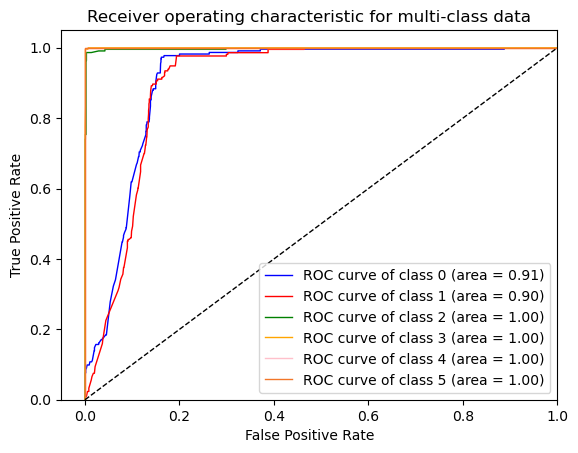

In [104]:
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc
from sklearn.multiclass import OneVsRestClassifier
from itertools import cycle

# Binarize the output
Y_r_adb = label_binarize(Y, classes=[0, 1, 2, 3, 4, 5])
n_classes = Y_r_adb.shape[1]


X_train_r_adb, X_test_r_adb, Y_train_r_adb, Y_test_r_adb = train_test_split(X, Y_r_adb, test_size=0.2, random_state=30)

classifier = OneVsRestClassifier(AdaBoostClassifier(n_estimators=100, learning_rate=1, random_state=0))

Y_score_r_adb = classifier.fit(X_train_r_adb, Y_train_r_adb).predict_proba(X_test_r_adb)  # Use predict_proba for probability scores

fpr = dict()
tpr = dict()
roc_auc = dict()
lw = 1

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(Y_test_r_adb[:, i], Y_score_r_adb[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

colors = cycle(['blue', 'red', 'green','orange','pink','#f27629'])

for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([-0.05, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic for multi-class data')
plt.legend(loc="lower right")
plt.show()

## Naive Bayes

In [105]:
from sklearn.naive_bayes import GaussianNB

# Naive Bayes Classifier
naive_bayes = GaussianNB()
naive_bayes.fit(trainX_scaled, Y_train)
pred_nb = naive_bayes.predict(testX_scaled)

print('Accuracy: {:.2f}'.format(accuracy_score(Y_test, pred_nb)))

Accuracy: 0.80


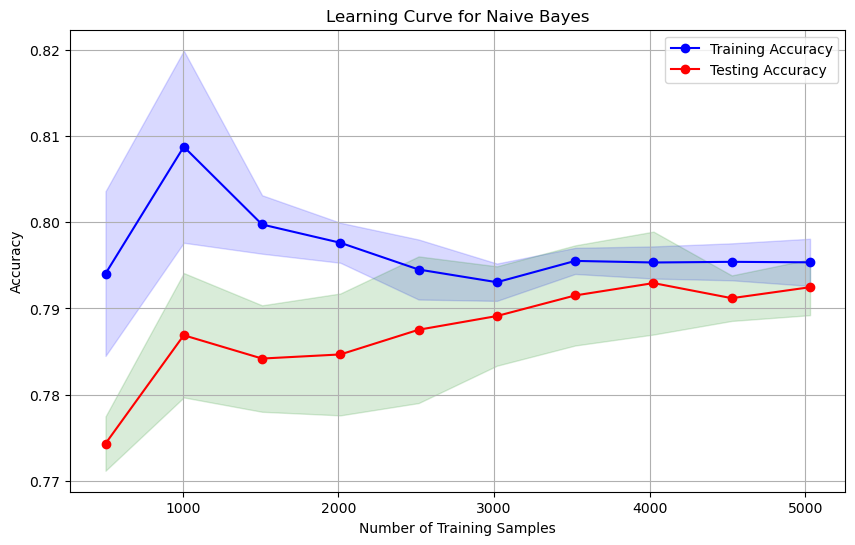

In [106]:
from sklearn.model_selection import learning_curve

# Use learning_curve to get training and testing scores at different training set sizes
train_sizes, train_scores, test_scores = learning_curve(
    naive_bayes, trainX_scaled, Y_train, cv=5, scoring='accuracy', train_sizes=np.linspace(0.1, 1.0, 10)
)

# Calculate mean and standard deviation of training and testing scores
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# Plot the learning curve
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_mean, marker='o', color='b', label='Training Accuracy')
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.15, color='b')

plt.plot(train_sizes, test_mean, marker='o', color='r', label='Testing Accuracy')
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, alpha=0.15, color='g')

# Add labels and title
plt.xlabel('Number of Training Samples')
plt.ylabel('Accuracy')
plt.title('Learning Curve for Naive Bayes')
plt.legend()
plt.grid(True)
plt.show()

In [107]:
# Classification Report for Naive Bayes
print(classification_report(Y_test, pred_nb))

              precision    recall  f1-score   support

           0       0.50      0.74      0.59       223
           1       0.50      0.13      0.20       213
           2       0.86      0.87      0.86       219
           3       0.85      0.91      0.88       227
           4       0.92      0.92      0.92       223
           5       0.94      1.00      0.97       468

    accuracy                           0.80      1573
   macro avg       0.76      0.76      0.74      1573
weighted avg       0.79      0.80      0.78      1573



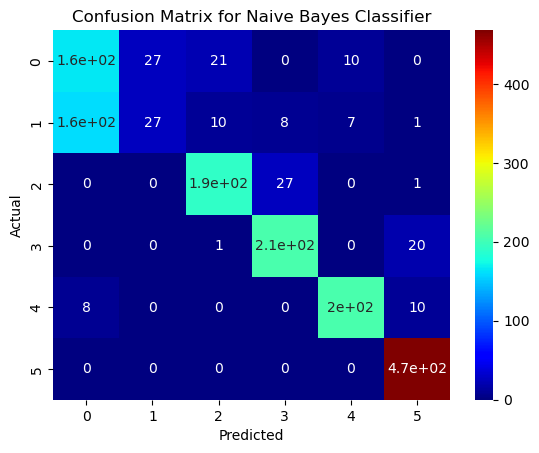

In [108]:
# Confusion Matrix for Naive Bayes
conf_matrix_nb = confusion_matrix(Y_test, pred_nb)
sns.heatmap(conf_matrix_nb, annot=True, cmap='jet')
plt.title("Confusion Matrix for Naive Bayes Classifier")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

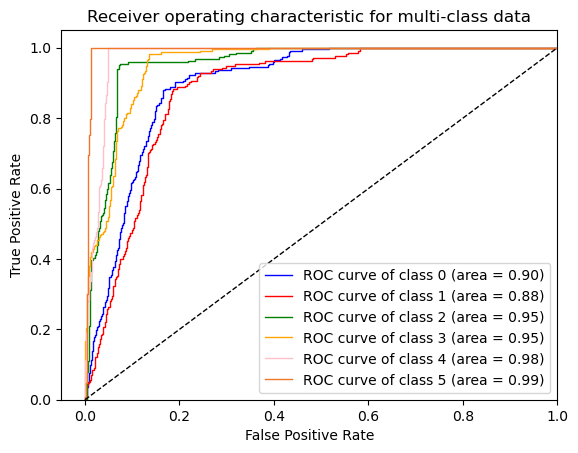

In [109]:
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc
from sklearn.multiclass import OneVsRestClassifier
from itertools import cycle

# Binarize the output
Y_r_nb = label_binarize(Y, classes=[0, 1, 2, 3, 4, 5])
n_classes = Y_r_nb.shape[1]


X_train_r_nb, X_test_r_nb, Y_train_r_nb, Y_test_r_nb = train_test_split(X, Y_r_nb, test_size=0.2, random_state=30)

classifier = OneVsRestClassifier(GaussianNB())

Y_score_r_nb = classifier.fit(X_train_r_nb, Y_train_r_nb).predict_proba(X_test_r_nb)  # Use predict_proba for probability scores

fpr = dict()
tpr = dict()
roc_auc = dict()
lw = 1

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(Y_test_r_nb[:, i], Y_score_r_nb[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

colors = cycle(['blue', 'red', 'green','orange','pink','#f27629'])

for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([-0.05, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic for multi-class data')
plt.legend(loc="lower right")
plt.show()

## ANN (Artificial Neural Network)

In [110]:
from sklearn.neural_network import MLPClassifier

In [111]:
ANN = MLPClassifier(hidden_layer_sizes=(100,80,50,30), max_iter=2000,
                     solver='adam',activation='relu',verbose=3,random_state=21)

In [112]:
ANN.fit(trainX_scaled, Y_train)
pred_ANN = ANN.predict(testX_scaled)

Iteration 1, loss = 1.54207453
Iteration 2, loss = 0.97228716
Iteration 3, loss = 0.57949460
Iteration 4, loss = 0.44326038
Iteration 5, loss = 0.39417869
Iteration 6, loss = 0.35835458
Iteration 7, loss = 0.33605131
Iteration 8, loss = 0.32454111
Iteration 9, loss = 0.30273829
Iteration 10, loss = 0.30118133
Iteration 11, loss = 0.29086268
Iteration 12, loss = 0.28115471
Iteration 13, loss = 0.28268943
Iteration 14, loss = 0.27382964
Iteration 15, loss = 0.26954820
Iteration 16, loss = 0.26373828
Iteration 17, loss = 0.26164459
Iteration 18, loss = 0.26291993
Iteration 19, loss = 0.25703070
Iteration 20, loss = 0.25270671
Iteration 21, loss = 0.24816094
Iteration 22, loss = 0.24746143
Iteration 23, loss = 0.24066616
Iteration 24, loss = 0.23860536
Iteration 25, loss = 0.24016382
Iteration 26, loss = 0.23600471
Iteration 27, loss = 0.23076365
Iteration 28, loss = 0.22632930
Iteration 29, loss = 0.23219790
Iteration 30, loss = 0.22948874
Iteration 31, loss = 0.22599206
Iteration 32, los

In [113]:
#accuracy.append(accuracy_score(Y_test, pred_ANN)
print('Accuracy: {:.2f}'.format(accuracy_score(Y_test, pred_ANN)))

Accuracy: 0.87


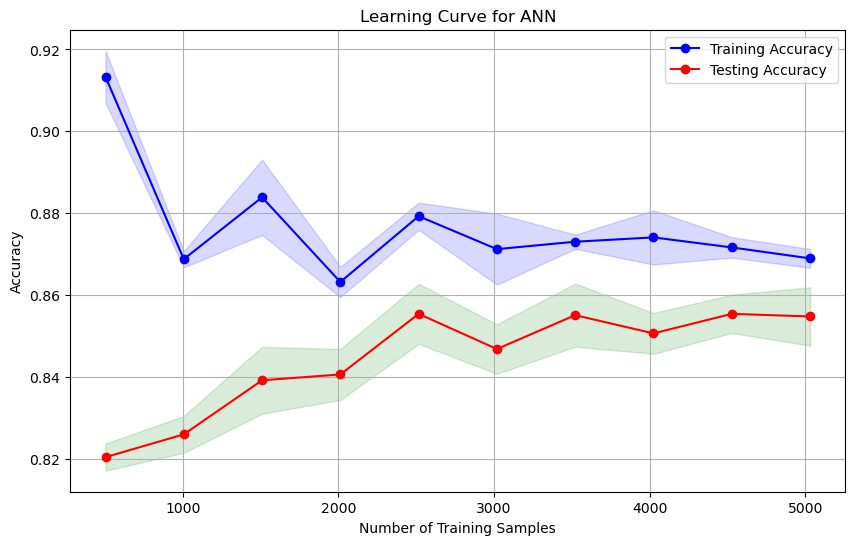

In [114]:
from sklearn.model_selection import learning_curve

ANN_learning = MLPClassifier(hidden_layer_sizes=(100,80,50,30), max_iter=2000,
                     solver='adam',activation='relu',random_state=21)

# Use learning_curve to get training and testing scores at different training set sizes
train_sizes, train_scores, test_scores = learning_curve(
    ANN_learning, trainX_scaled, Y_train, cv=5, scoring='accuracy', train_sizes=np.linspace(0.1, 1.0, 10)
)

# Calculate mean and standard deviation of training and testing scores
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# Plot the learning curve
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_mean, marker='o', color='b', label='Training Accuracy')
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.15, color='b')

plt.plot(train_sizes, test_mean, marker='o', color='r', label='Testing Accuracy')
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, alpha=0.15, color='g')

# Add labels and title
plt.xlabel('Number of Training Samples')
plt.ylabel('Accuracy')
plt.title('Learning Curve for ANN')
plt.legend()
plt.grid(True)
plt.show()

In [115]:
print(classification_report(Y_test,pred_ANN))

              precision    recall  f1-score   support

           0       0.53      1.00      0.69       223
           1       0.85      0.08      0.15       213
           2       1.00      0.97      0.99       219
           3       0.97      1.00      0.99       227
           4       1.00      0.98      0.99       223
           5       1.00      1.00      1.00       468

    accuracy                           0.87      1573
   macro avg       0.89      0.84      0.80      1573
weighted avg       0.91      0.87      0.83      1573



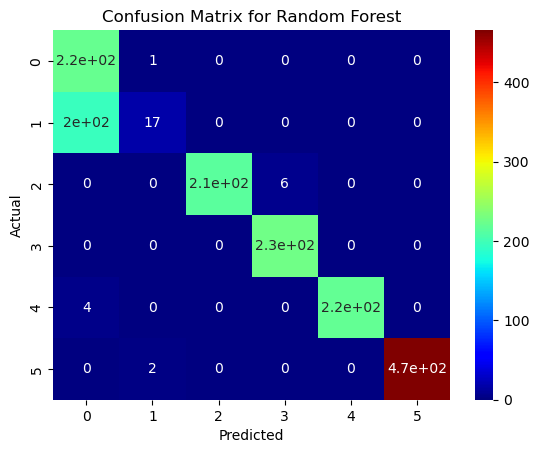

In [116]:
# When Ever we have any Kind of table we can represent
# it using Heat Map
conf_matrix=confusion_matrix(Y_test,pred_ANN)
sns.heatmap(conf_matrix,annot=True,cmap='jet')

plt.title("Confusion Matrix for Random Forest")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

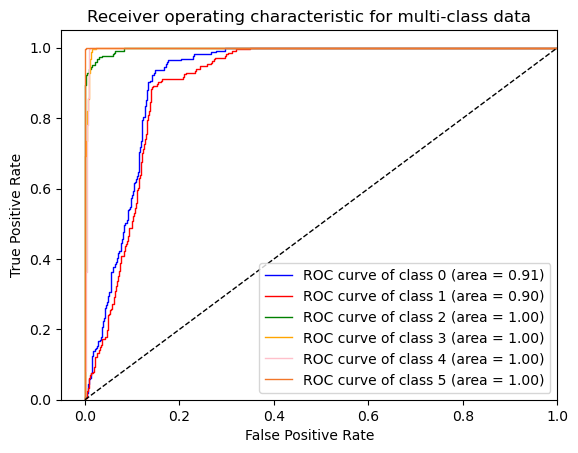

In [117]:
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc
from sklearn.multiclass import OneVsRestClassifier
from itertools import cycle

# Binarize the output
Y_r_ann = label_binarize(Y, classes=[0, 1, 2, 3, 4, 5])
n_classes = Y_r_ann.shape[1]


X_train_r_ann, X_test_r_ann, Y_train_r_ann, Y_test_r_ann = train_test_split(X, Y_r_ann, test_size=0.2, random_state=30)

classifier = OneVsRestClassifier(MLPClassifier(hidden_layer_sizes=(100,80,50,30), max_iter=2000,
                     solver='adam',activation='relu',random_state=21))

Y_score_r_ann = classifier.fit(X_train_r_ann, Y_train_r_ann).predict_proba(X_test_r_ann)  # Use predict_proba for probability scores

fpr = dict()
tpr = dict()
roc_auc = dict()
lw = 1

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(Y_test_r_ann[:, i], Y_score_r_ann[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

colors = cycle(['blue', 'red', 'green','orange','pink','#f27629'])

for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([-0.05, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic for multi-class data')
plt.legend(loc="lower right")
plt.show()

### COMPARISON OF ACCURACY OF DIFFERENT MODEL

In [118]:
accuracy=[]
# Logistic Regression
accuracy.append(accuracy_score(Y_test, predlog2)*100)

# KNN
accuracy.append(accuracy_score(Y_test, pred_knn)*100)

# SVM
accuracy.append(accuracy_score(Y_test,grid_predictions_svm)*100)

# Decision Tree
accuracy.append(accuracy_score(Y_test, predictions_dt)*100)

# RandomForest
accuracy.append(accuracy_score(Y_test, predictions_rfc)*100)

# AdaBoost
accuracy.append(accuracy_score(Y_test, pred_adb)*100)

# Naive Bayas
accuracy.append(accuracy_score(Y_test, pred_nb)*100)

# ANN
accuracy.append(accuracy_score(Y_test, pred_ANN)*100)

In [119]:
accuracy

[34.13858868404323,
 89.25619834710744,
 85.2511125238398,
 89.00190718372536,
 87.730451366815,
 70.62937062937063,
 80.22886204704388,
 86.7132867132867]

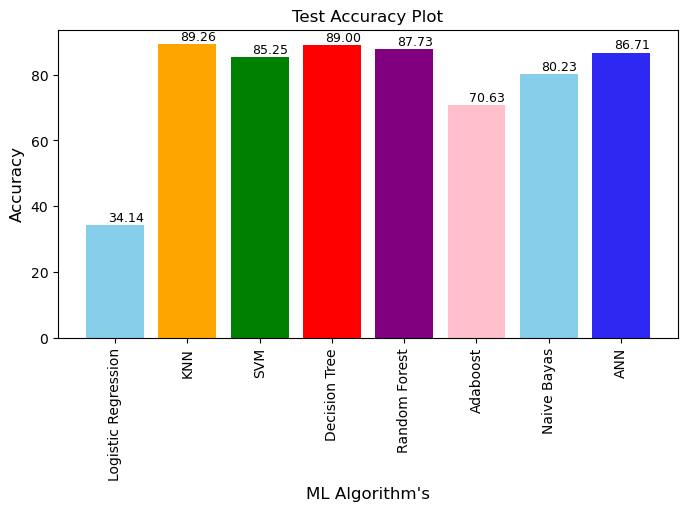

In [120]:
plt.figure(figsize = (8,4))
model_name = ['Logistic Regression','KNN','SVM','Decision Tree','Random Forest','Adaboost','Naive Bayas','ANN']

# Define colors for each bar
colors = ['skyblue', 'orange', 'green', 'red', 'purple', 'pink','skyblue','#2d29f2']

# Create a bar plot
bars=plt.bar(model_name, accuracy, color=colors)

# Add labels and title
plt.xlabel("ML Algorithm's",fontsize=12)
plt.xticks(rotation=90)
plt.ylabel('Accuracy',fontsize=12)
plt.title('Test Accuracy Plot')

# Add values on top of each bar
for bar, acc in zip(bars, accuracy):
    plt.text(bar.get_x() + bar.get_width() / 2 - 0.1, bar.get_height() + 1.2, f'{acc:.2f}', fontsize=9)

# Display the plot
plt.show()

### Comparison of Precision,Recall,F1 Scole of Different ML Models

In [121]:
from sklearn.metrics import precision_score, recall_score, f1_score
prec=[]
rec=[]
f1=[]

# Logistic Regression
prec.append(precision_score(Y_test, predlog2,average='weighted'))
rec.append(recall_score(Y_test, predlog2,average='weighted'))
f1.append(f1_score(Y_test, predlog2,average='weighted'))

# KNN
prec.append(precision_score(Y_test, pred_knn,average='weighted'))
rec.append(recall_score(Y_test, pred_knn,average='weighted'))
f1.append(f1_score(Y_test, pred_knn,average='weighted'))

# SVM
prec.append(precision_score(Y_test, grid_predictions_svm,average='weighted'))
rec.append(recall_score(Y_test, grid_predictions_svm,average='weighted'))
f1.append(f1_score(Y_test, grid_predictions_svm,average='weighted'))

# Decision Tree
prec.append(precision_score(Y_test, predictions_dt,average='weighted'))
rec.append(recall_score(Y_test, predictions_dt,average='weighted'))
f1.append(f1_score(Y_test, predictions_dt,average='weighted'))

# Random Forest
prec.append(precision_score(Y_test, predictions_rfc,average='weighted'))
rec.append(recall_score(Y_test, predictions_rfc,average='weighted'))
f1.append(f1_score(Y_test, predictions_rfc,average='weighted'))

# Adaboost
prec.append(precision_score(Y_test, pred_adb,average='weighted'))
rec.append(recall_score(Y_test, pred_adb,average='weighted'))
f1.append(f1_score(Y_test, pred_adb,average='weighted'))

# Naive Bayas
prec.append(precision_score(Y_test, pred_nb,average='weighted'))
rec.append(recall_score(Y_test, pred_nb,average='weighted'))
f1.append(f1_score(Y_test, pred_nb,average='weighted'))

# ANN
prec.append(precision_score(Y_test, pred_ANN,average='weighted'))
rec.append(recall_score(Y_test, pred_ANN,average='weighted'))
f1.append(f1_score(Y_test, pred_ANN,average='weighted'))

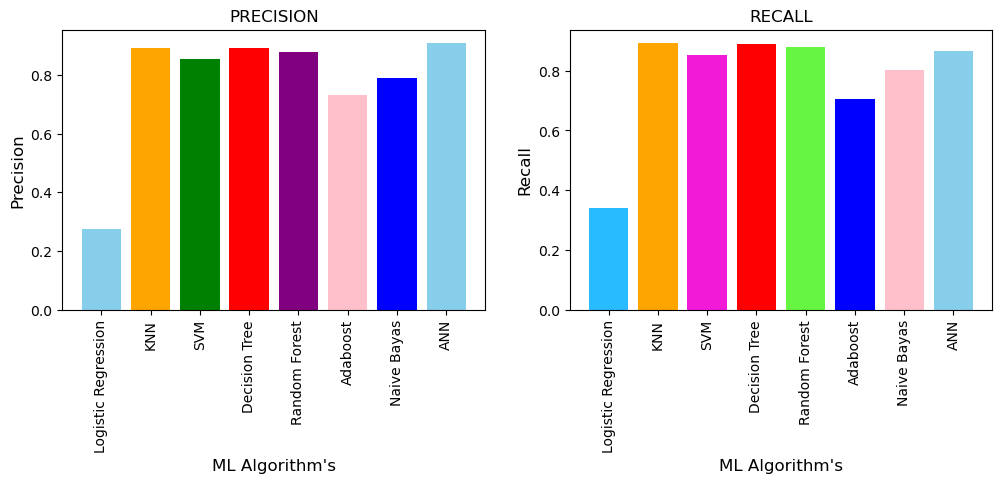

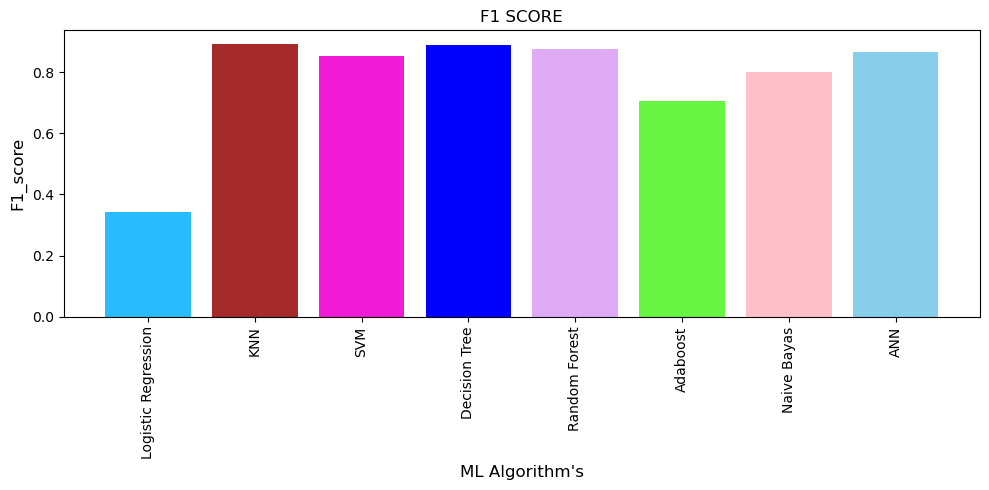

In [122]:
plt.figure(figsize = (12,8))
model_name = ['Logistic Regression','KNN','SVM','Decision Tree','Random Forest','Adaboost','Naive Bayas','ANN']

# Define colors for each bar
colors1 = ['skyblue', 'orange', 'green', 'red','purple', 'pink','blue','skyblue']
colors2 = ['#29bbff', 'orange', '#f01ad7', 'red', '#66f542','blue','pink','skyblue']
colors3 = ['#29bbff', 'brown', '#f01ad7', 'blue','#e0abf5', '#66f542', 'pink','skyblue']
# Create a bar plot
plt.bar(model_name, prec, color=colors)


plt.subplot(2,2,1)
plt.bar(model_name,prec,color=colors1)
plt.xlabel("ML Algorithm's",fontsize=12)
plt.xticks(rotation=90)
plt.ylabel('Precision',fontsize=12)
plt.title('PRECISION')

plt.subplot(2,2,2)
plt.bar(model_name,rec,color=colors2)
plt.xlabel("ML Algorithm's",fontsize=12)
plt.xticks(rotation=90)
plt.ylabel('Recall',fontsize=12)
plt.title('RECALL')

plt.figure(figsize = (10,5))
plt.bar(model_name,rec,color=colors3)
plt.xlabel("ML Algorithm's",fontsize=12)
plt.xticks(rotation=90)
plt.ylabel('F1_score',fontsize=12)
plt.title('F1 SCORE')

# Display the plot
plt.tight_layout()
plt.show()


In [123]:
accuracy

[34.13858868404323,
 89.25619834710744,
 85.2511125238398,
 89.00190718372536,
 87.730451366815,
 70.62937062937063,
 80.22886204704388,
 86.7132867132867]

In [124]:
prec

[0.27553930013767863,
 0.8926901994881977,
 0.8525509779778737,
 0.8902218453541153,
 0.8771875018344534,
 0.7317665779008897,
 0.7899390368538182,
 0.9087840449118239]

In [125]:
rec

[0.3413858868404323,
 0.8925619834710744,
 0.852511125238398,
 0.8900190718372537,
 0.87730451366815,
 0.7062937062937062,
 0.8022886204704387,
 0.8671328671328671]

In [126]:
f1

[0.21348608070173797,
 0.8923770444980929,
 0.8514873679232713,
 0.8901047312290895,
 0.8769795286393685,
 0.66385710630729,
 0.7771986437512534,
 0.8344346755890307]

In [127]:
import pickle
pickle.dump(scaler,open('scaler.pkl','wb'))
pickle.dump(knn,open('knn.pkl','wb'))

In [128]:
model=pickle.load(open('knn.pkl','rb'))
standard_scaler=pickle.load(open('scaler.pkl','rb'))

In [129]:
new_data_scaled=standard_scaler.transform([[-151,-9.67,85.8,0.4,-0.132,-0.2678]])
result=model.predict(new_data_scaled)
result

array([5])

In [130]:
result[0]

5

In [ ]:
{'Line A Line B Line C Fault': 0, 
'Line A Line B Line C to Ground Fault': 1,
'Line A Line B to Ground Fault': 2,
'Line A to Ground Fault': 3,
'Line B to Line C Fault': 4,
'NO Fault': 5}

In [131]:
df_new.head()

,G,C,B,A,Ia,Ib,Ic,Va,Vb,Vc,Fault_Type
0,1,0,0,1,-151.291812,-9.677452,85.800162,0.400750,-0.132935,-0.267815,3
1,1,0,0,1,-336.186183,-76.283262,18.328897,0.312732,-0.123633,-0.189099,3
2,1,0,0,1,-502.891583,-174.648023,-80.924663,0.265728,-0.114301,-0.151428,3
3,1,0,0,1,-593.941905,-217.703359,-124.891924,0.235511,-0.104940,-0.130570,3
4,1,0,0,1,-643.663617,-224.159427,-132.282815,0.209537,-0.095554,-0.113983,3


In [134]:
df_new.columns

Index(['G', 'C', 'B', 'A', 'Ia', 'Ib', 'Ic', 'Va', 'Vb', 'Vc', 'Fault_Type'], dtype='object')

In [136]:
# Line A Line B Line C Fault: 0
df_new[df_new['Fault_Type']==0].head()

,G,C,B,A,Ia,Ib,Ic,Va,Vb,Vc,Fault_Type
3267,0,1,1,1,-99.274309,44.146905,57.318650,0.412305,-0.091525,-0.320781,0
3268,0,1,1,1,-342.196277,218.566556,125.820753,0.095905,-0.003471,-0.092434,0
3269,0,1,1,1,-526.696029,347.197345,181.689494,-0.131094,0.056790,0.074304,0
3270,0,1,1,1,-633.453623,416.942091,218.702118,-0.245984,0.084683,0.161301,0
3271,0,1,1,1,-639.192926,412.122656,229.260639,-0.224523,0.075580,0.148943,0


In [137]:
# Line A Line B Line C to Ground Fault: 1
df_new[df_new['Fault_Type']==1].head()

,G,C,B,A,Ia,Ib,Ic,Va,Vb,Vc,Fault_Type
4363,1,1,1,1,-99.252463,52.717974,48.341534,0.410059,-0.086914,-0.323145,1
4364,1,1,1,1,-342.238819,224.821345,119.149604,0.095347,-0.002326,-0.093021,1
4365,1,1,1,1,-526.874012,351.614759,176.674369,-0.130437,0.055441,0.074996,1
4366,1,1,1,1,-633.768916,420.246089,214.577137,-0.244709,0.082066,0.162643,1
4367,1,1,1,1,-639.566896,415.329565,225.117414,-0.223359,0.073192,0.150167,1


In [1]:
# Lina A Line B to Ground fault: 2
df_new[df_new['Fault_Type']==2].head()

NameError: name 'df_new' is not defined

In [138]:
# Line A to Ground Fault: 3
df_new[df_new['Fault_Type']==3].head()

,G,C,B,A,Ia,Ib,Ic,Va,Vb,Vc,Fault_Type
0,1,0,0,1,-151.291812,-9.677452,85.800162,0.400750,-0.132935,-0.267815,3
1,1,0,0,1,-336.186183,-76.283262,18.328897,0.312732,-0.123633,-0.189099,3
2,1,0,0,1,-502.891583,-174.648023,-80.924663,0.265728,-0.114301,-0.151428,3
3,1,0,0,1,-593.941905,-217.703359,-124.891924,0.235511,-0.104940,-0.130570,3
4,1,0,0,1,-643.663617,-224.159427,-132.282815,0.209537,-0.095554,-0.113983,3


In [139]:
# Line B to Line C Fault: 4
df_new[df_new['Fault_Type']==4].head()

,G,C,B,A,Ia,Ib,Ic,Va,Vb,Vc,Fault_Type
2263,0,1,1,0,41.764455,-93.940215,55.022192,0.517510,-0.003685,-0.513825,4
2264,0,1,1,0,42.394348,-105.038998,65.494029,0.518491,-0.008071,-0.510420,4
2265,0,1,1,0,43.010571,-105.734383,65.569977,0.511217,0.003798,-0.515015,4
2266,0,1,1,0,43.612456,-100.121739,59.347319,0.499096,0.025105,-0.524201,4
2267,0,1,1,0,44.202230,-95.078643,53.707382,0.487527,0.045052,-0.532579,4


In [140]:
# No Fault: 5
df_new[df_new['Fault_Type']==5].head()

,G,C,B,A,Ia,Ib,Ic,Va,Vb,Vc,Fault_Type
5496,0,0,0,0,61.806321,-22.861987,21.102428,0.366320,-0.567179,0.200859,5
5497,0,0,0,0,48.041678,-23.401108,21.273066,0.367341,-0.564257,0.196916,5
5498,0,0,0,0,34.256533,-23.909263,21.408047,0.368258,-0.561168,0.192910,5
5499,0,0,0,0,20.464350,-24.396165,21.501503,0.369086,-0.557916,0.188830,5
5500,0,0,0,0,7.109677,-25.075888,21.341967,0.370321,-0.554505,0.184184,5
